# PHYS***** - Project 2 - Numerical Integration of Differential Equations - The Damped Oscillator

James Emberton - ID: ********,
University of Manchester,
March 2025

Given parameters: $k = 0.67kgs^{-2}$, $m = 5.72kg$

Import and initialise:

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as opt
from matplotlib.animation import FuncAnimation
from IPython import display

***

## Contents
<b> [1 - Introduction](#1---Introduction)

<b> [2 - The General Solution to the Unforced, Damped Harmonic Oscillator Equation](#2---The-General-Solution-to-the-Unforced,-Damped-Harmonic-Oscillator-Equation)

> [2.1 - Light Damping](#2.1---Light-Damping)

> [2.2 - Heavy Damping](#2.2---Heavy-Damping)

> [2.3 - Critical Damping](#2.3---Critical-Damping)

> [2.4 - Analytical Solution](#2.4---Analytical-Solution)

<b> [3 - The Euler Method](#3---The-Euler-Method)

> [3.1 - What is the Euler Method?](#3.1---What-is-the-Euler-Method?)

> [3.2 - The Method and it's Quality as a Function of step, h](#3.2---The-Method-and-it's-Quality-as-a-Function-of-step,-h)

> [3.3 - Error in the Euler Method](#3.3---Error-in-the-Euler-Method)

> [3.4 - Energy Analysis for The Euler Method](#3.4---Energy-Analysis-for-The-Euler-Method)

<b> [4 - The Improved-Euler Method](#4---The-Improved-Euler-Method)

> [4.1 - What is the Improved-Euler Method?](#4.1---What-is-the-Improved-Euler-Method?)

> [4.2 - The Method and it's Quality as a Function of step, h](#4.2---The-Method-and-it's-Quality-as-a-Function-of-step,-h)

> [4.3 - Error in the Improved-Euler Method](#4.3---Error-in-the-Improved-Euler-Method)

<b> [5 - The Verlet Method](#5---The-Verlet-Method)

> [5.1 - What is the Verlet Method?](#5.1---What-is-the-Verlet-Method?)

> [5.2 - The Method and it's Quality as a Function of step, h](#5.2---The-Method-and-it's-Quality-as-a-Function-of-step,-h)

> [5.3 - Error in the Verlet Method](#5.3---Error-in-the-Verlet-Method)

<b> [6 - The Euler-Cromer Method](#6---The-Euler-Cromer-Method)

> [6.1 - What is the Euler-Cromer Method?](#6.1---What-is-the-Euler-Cromer-Method?)

> [6.2 - The Method and it's Quality as a Function of step, h](#6.2---The-Method-and-it's-Quality-as-a-Function-of-step,-h)

> [6.3 - Error in the Euler-Cromer Method](#6.3---Error-in-the-Euler-Cromer-Method)

<b> [7 - Analysis of the Methods](#7---Analysis-of-the-Methods)

<b> [8 - Damping and its Effect on the Solution to the Oscillator Equation](#8---Damping-and-its-Effect-on-the-Solution-to-the-Oscillator-Equation)

> [8.1 - Zero Damping Visualised](#8.1---Zero-Damping-Visualised)

> [8.2 - Damping Conditions Visualised](#8.2---Damping-Conditions-Visualised)

> [8.3 - The Quality Factor](#8.3---The-Quality-Factor)

<b> [9 - External Forces](#9---External-Forces)

> [9.1 - Constant, Sudden Pushing Force](#9.1---Constant,-Sudden-Pushing-Force)

> [9.2 - Sinusoidal Driving Force](#9.2---Sinusoidal-Driving-Force)
> > [9.2.1 - General Sinusoidal Driving Force](#9.2.1---General-Sinusoidal-Driving-Force)

> > [9.2.2 - Varied Amplitude](#9.2.2---Varied-Amplitude)

> > [9.2.3 - Varied Frequency](#9.2.3---Varied-Frequency)

> [9.3 - Resonance](#9.3---Resonance)

<b> [10 - Conclusion](#10---Conclusion)

<b> [Appendix](#Appendix)

> [1 - Animated Plot](#1---Animated-Plot)

***

## 1 - Introduction

We are presented with the forced, damped harmonic oscillator equation,

\begin{equation*}
m\frac{d^{2}x(t)}{dt^{2}} + b\frac{dx(t)}{dt} + kx(t) = F(x), \tag{1}
\end{equation*}

which describes the displacement from the equilibrium over time, $x(t)$ (m) of a harmonic oscillator system of mass $m$ (kg), damping constant $b$ (kgs$^{-1}$) and spring constant $k$ (Nm$^{-1}$).

If $F(x) = 0$, we can solve this analytically, however if it is non-zero, it becomes a more complicated problem. This is where numerical integration methods become useful; we can use them to approximate solutions we cannot otherwise find. We will be testing four methods, the Euler, Improved Euler, Verlet and the Euler-Cromer method, and comparing their respective errors to determine which method is the most accurate. We will do this for the case where $F(x) = 0$, so that we can compare the analytical solution to the solution generated by each numerical method in detail.

Following this, we will explore how the level of damping of a system affects the form of its motion, and how applying a sudden push or sinusoidal driving signal changes the system's evolution with time. Finally, we will investigate the phenomenon of resonance.

<b> [Go Back To Contents](#Contents)

***

## 2 - The General Solution to the Unforced, Damped Harmonic Oscillator Equation

### 2.1 - Light Damping

The general solution to equation $(1)$ where $F(x) = 0$ in the condition of $\textbf{light damping}$ is 

\begin{equation*}
x(t) = e^{-\frac{\gamma t}{2}}(A\sin{\omega t} + B\cos{\omega t}), \tag{2}
\end{equation*}

where $\gamma = \frac{b}{m}$ s$^{-1}$, $\omega^{2} = \omega_{0}^{2} - \frac{\gamma^{2}}{4}$ rad$^{2}$s $^{-2}$ (where $\omega_{0}^{2} = \frac{k}{m}$), and A and B are arbitrary constants determined by initial conditions. We recall that the light damping condition is for $\omega^{2} > 0$, such that $\omega_{0}^{2} > \frac{\gamma^{2}}{4}$. This means our system can perform multiple oscillations before decaying to equilibrium, as the $\omega_{0}^{2}$ (oscillating term) dominates. 

### 2.2 - Heavy Damping

In the condition of $\textbf{heavy damping}$, we have that $\omega_{0}^{2} < \frac{\gamma^{2}}{4}$, so that now our damping term dominates. This yields a different solution of 

\begin{equation*}
x(t) = e^{-\frac{\gamma t}{2}}(Ae^{\alpha t} + Be^{-\alpha t}) \tag{3}
\end{equation*}

where $\alpha = \sqrt{\frac{\gamma^{2}}{4} - \omega_{0}^{2}}$ and is a real number. With the system's damping dominating, the oscillations of the system are stifled and so the displacement from the equilibrium conditions decays exponentially.

### 2.3 - Critical Damping
In the case that $\omega_{0}^{2} = \frac{\gamma^{2}}{4}$, we have $\textbf{critical damping}$. This is where the oscillations of the system are brought to equilibrium in the quickest possible time. The solution at this point is 

\begin{equation*}
x(t) = e^{-\frac{\gamma t}{2}}(A + Bt). \tag{4}
\end{equation*}

Therefore varying b in the original differential equation will affect the analytical solution we obtain.

### 2.4 - Analytical Solution

For the values of $k$ and $m$ specified at the beginning of this notebook, we can obtain the value of $b$ that will yield critical damping (and thus the threshold between light and heavy damping conditions) by the formula $b_{crit}^{2} = 4km$. This gives us $b_{crit}^{2} = 3.915Nsm^{-1}$, below which will yield light damping and above which will yield heavy damping. Therefore, for the first part of this notebook where we aim to find the most suitable method of numerical integration, we will fix the value of $b$ at 0.4 to give us a firm lightly damped system, and we will be able to see several distinct oscillations. This means our analytical solution is given by equation $(2)$ as previously discussed, which we will compare each numerical integration method to in order to determine which is the most accurate to the real solution.

Using that $b = 0.4Nsm^{-1}$, $k = 0.67kgs^{-2}$ and $m = 5.72kg$, as well as that our intitial conditions are $x(0) = 0 m$ and $\left.\frac{dx(t)}{dt}\right|_{t=0} = -1 ms^{-1}$, we can evaluate our analytical solution as 

\begin{equation*}
-2.937\sin{(0.3404t)}e^{-0.03497t}, \tag{5}
\end{equation*}

which we can plot as a reference to see how the different methods work to get closer to the true solution. To visualise the evolution of the system further, it is possible to create an animation showing the decay in the amplitude of the system (See [Appendix](#Appendix)).

<b> [Go Back To Contents](#Contents)

***
## 3 - The Euler Method
### 3.1 - What is the Euler Method?

The Euler method is a first order technique of integrating functions, which we can simply derive by considering a Taylor expansion of our solution $x(t)$ about a small step of time, $h$ (s):

\begin{equation*}
x(t+h) \approx x(t) + hx'(t) + \frac{1}{2}h^{2}x''(\zeta), \tag{6} 
\end{equation*}

where $t < \zeta < t+h$. The last term here is indicative of the local error at this point, and gives us that the error should be of order $h$. Considering the first two terms of this expansion, we can apply the same logic to $v(t+h) = \frac{dx(t)}{dt} \approx v(t) + ha(t)$ where $a(t)$, the acceleration at a particular time $t$, is equal to $\frac{d^{2}x}{dt^{2}}$. In programming terms, this means we will have the following equations:

$x_{i+1} = x_{i} + hv_{i}$

$v_{i+1} = v_{i} + ha_{i}$

$a_{i} = -\frac{k}{m}x_{i} - \frac{b}{m}v_{i}$ where again we acknowledge that $h$ is a small step in time.

It is clear to see from these equations that our numerically derived solution will of a higher quality for a smaller $h$. As the Euler method is an explicit method of integration, we are calculating the value of $v_{i}$ in terms of previous iterations of $v$, which for a sufficiently large value of $h$ will cause a significant deviation from the solution we have obtained analytically. Another way of stating this is that the Euler method is an energy-increasing method of integration, in that over a series of iterations, it will artifically enlarge the energy of the system, providing a decreasingly accurate solution. 

### 3.2 - The Method and it's Quality as a Function of step, h

We will perform a Euler integration of the differential equation $(1)$ where $F(x) = 0$ as to be able to compare it to the analytical solution given by equation $(5)$. Several plots are shown below using different steps, $h$ (s), to illustrate the effect of varying its value. We will use the same initial conditions as indicated in [section 2.4](#2.4---Analytical-Solution).

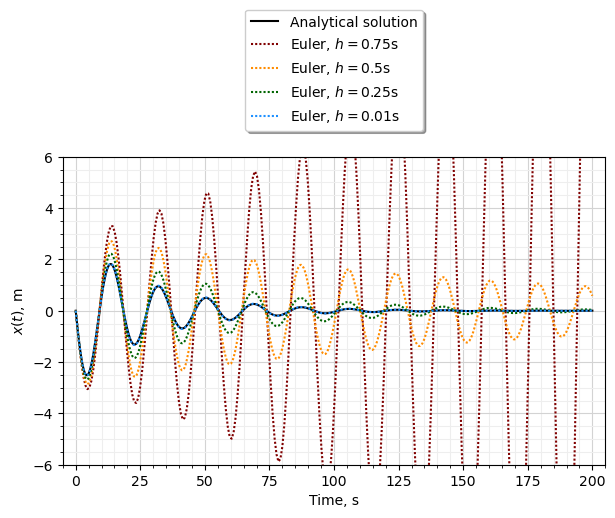

In [2]:
# Define constants that we have been given for our system
m = 5.72 #kg
k = 0.67 #kgm^-2

# For now we will set the damping constant at a value of 0.4 for simplicity
b = 0.4 #kgs^-1

# We can define for how many seconds of time we wish to integrate over
T = 200 #s

# We can also define an array for the step, h, so that we may test multiple values
h_array = np.linspace(0.01, 1.0, 100) #s
h_array = np.array(h_array[::-1])

def euler(h):
    '''
    Runs our Euler method of numerical integration, and plots every 10 values of h for the user to see how the
    approximation improves as h gets smaller.

    VARIABLES
    --------------------------
    n : INTEGER - number of steps needed
    x : NUMPY ARRAY - values of amplitude of oscillation
    v : NUMPY ARRAY - values of velocity of oscillation
    a : FLOAT - acceleration at a time t
    h : FLOAT - step, in s
    E : NUMPY ARRAY - values of energy at each time
    residual : NUMPY ARRAY - values of difference between analytical solution and numerical method
    error_max : FLOAT - maximum value of the residual array

    RETURNS
    --------------------------
    max_error
    '''
    
    # We will define the number of steps that we need to take based on our values of T and h:
    n = int(T / h)
    x = np.zeros(n)
    v = np.zeros(n)
    E = np.zeros(n)

    # Let us also define initial values for x and v at t = 0
    x[0] = 0 #m
    v[0] = -1 #m/s
    E[0] = 0.5 * m * (v[0] ** 2)
    
    for i in range(len(x) - 1):
        # Finds acceleration for particular i
        a = (-(k / m) * x[i]) - ((b / m) * v[i])

        # Finds the corresponding v and x value and replaces the zero with that value in the x and v arrays
        x[i+1] = x[i] + (h * v[i])
        v[i+1] = v[i] + (h * a)
        
        # Finds energy value at a time t
        E[i+1] = 0.5 * ((m * (v[i+1] ** 2)) + (k * (x[i+1] ** 2)))

    # Creates a time array and then uses it find an array for the analytical x and v for further analysis
    time = np.linspace(0, T, n)
    model_sol = analytical_sol(time)
    model_v = analytical_v(time)

    # Creates an array for the theoretical energy
    E_analytical = np.zeros(len(time))
    
    # Fills in the analytical energy array
    for j in range(len(E_analytical)):
        E_analytical[j] = 0.5 * ((m * (model_v[j] ** 2)) + (k * (model_sol[j] ** 2)))
        
    # Calculates the difference between analytical solution 
    residual = np.abs(x - model_sol)

    # Finds the maximum value of the residual array
    error_max = np.max(residual)
            
    return error_max, x, E, time, E_analytical

def analytical_sol(t):
    '''
    Returns the value of the analytical solution to the oscillator equation at a time t

    VARIABLES
    --------------------------
    t : FLOAT - time value
    '''
    
    return -2.937 * np.sin(0.3404 * t) * np.exp(-0.03497 * t)

def analytical_v(t):
    '''
    Returns the value of the analytical velocity at a time t

    VARIABLES
    --------------------------
    t : FLOAT - time value
    '''
    
    return np.exp(-0.03497 * t) * ((0.1027 * np.sin(0.3404 * t)) - np.cos(0.3404 * t)) 


# We can define a general plotter fucntion for the first few sections here as all the plots will be similar
def x_plotter(time, x, h, method_name):
    '''
    General plotter for each method for visualisation

    VARIABLES
    --------------------------
    fig : CLASS
    ax : OBJECT
    time : NUMPY ARRAY - time of oscillation
    x : NUMPY ARRAY - amplitude of oscillation
    v : NUMPY ARRAY - velocity of oscillation
    method_name : STRING - name of method
    colours : ARRAY - colours for lines on plot
    
    '''
    
    # Creates figure and axis
    fig, ax = plt.subplots(figsize = (7, 4))
    colours = ['maroon', 'darkorange', 'darkgreen', 'dodgerblue']
    
    # Plots the analytical solution and all selected method solutions
    ax.plot(time[-1], analytical_sol(time[-1]), color = 'black', label = 'Analytical solution')

    for i in range(len(h)):
        ax.plot(time[i], x[i], color = colours[i], linestyle = (0, (1, 1)), label = rf'{method_name}, $h = {h[i]}$s')
    
    # Sets legend position and creates a grid on each plot for clarity
    ax.legend(bbox_to_anchor = (0.5, 1.5), loc = 'upper center', fancybox = True, shadow = True)
    ax.grid(which = 'major', color = 'lightgray')
    ax.grid(which = 'minor', color = '#EEEEEE')
    ax.minorticks_on()

    # Euler is most inefficient method so we set different x and y lims for it
    if method_name == 'Euler':
        ax.set_xlim(xmin = -5, xmax = 205)
        ax.set_ylim(ymin = -6, ymax = 6)

    else:
        ax.set_xlim(xmin = -5, xmax = 205)
        ax.set_ylim(ymin = -2.6, ymax = 2.6)

        
    # Sets axis labels
    ax.set_ylabel(r'$x(t)$, m')
    ax.set_xlabel('Time, s')


# Creates a new array made up of the maximum residual value for each value of h by calling our euler function
euler_error = np.array([euler(i)[0] for i in h_array])

# Creates arrays for a few quantities we will need to plot the graph
euler_x = []
euler_h = []
euler_time = []

# There are many h values - we want to select just a few to show
for i in [0.75, 0.5, 0.25, 0.01]:
    euler_x.append(euler(i)[1])
    euler_h.append(i)
    euler_time.append(euler(i)[3])

# Calls the function to plot the graph with all given paramters
x_plotter(euler_time, euler_x, euler_h, 'Euler')

$\textit{Figure 1 - The Euler method versus the analytical solution for a range of step sizes.}$

We can see from Figure 1 that for larger steps, particularly for $h \gtrsim 0.5$s, the Euler method diverges away from the solution, and is only able to find the solution in the limit of very small $h$. For $h = 0.01$s, we can see the solution is very close to, but not exactly equal to the analytical solution.

### 3.3 - Error in the Euler Method

We need to find some way of quantifying the efficacy of each method. A simple way of doing this is to find the residual, or the difference between the model's value and the analytical solution's value at each time, $t$, for a particular $h$ and then finding the maximum value of that array of residuals. We can repeat this for every value of $h$ we are testing in order to quantify the maximum error of the method as a function of time step. To make this clearer, we can visualise it with a plot.

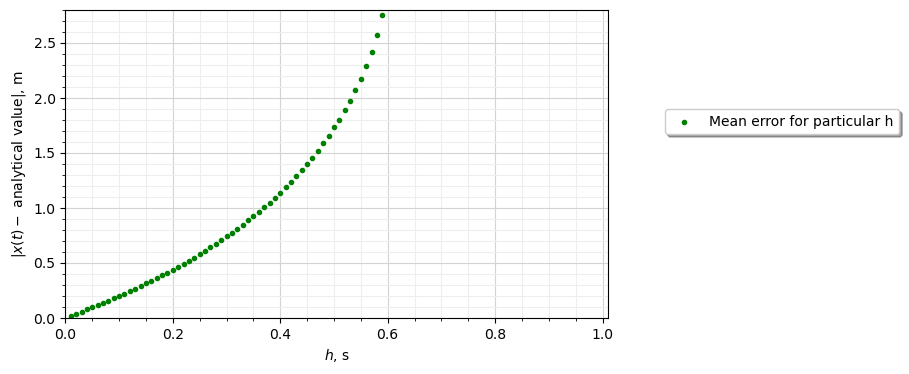

In [3]:
# Creates the figure and axis
fig, ax = plt.subplots(figsize = (7, 4))

# Plots the residuals against time step
ax.scatter(h_array, euler_error, marker = '.', color = 'green', label = 'Mean error for particular h')

# Sets titles, axis labels and limits
ax.set_xlabel(r'$h$, s')
ax.set_ylabel(r'$|x(t) -$ analytical value$|$, m')
ax.set_xlim(0, 1.01)
ax.set_ylim(0, 2.8)

# Sets legend and its location, and puts a grid on the plot.
ax.legend(bbox_to_anchor = (1.55, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 2 - Error in the Euler method as a function of step.}$

The error (for which we use the maximum residual as a proxy) clearly increases very quickly with a large step value, but is visibly linear in the limit of small $h$. Let us now repeat this analysis for the remaining three methods of numerical integration we wish to investigate, and use this residual analysis to determine which numerical integration method is the most efficient. 

### 3.4 - Energy Analysis for The Euler Method

Before we move on to the next method, it would be appropriate to elaborate on the claim we made in [section 3.1](#3.1---What-is-the-Euler-Method?) - that the Euler method is not energy conserving. To do this we can plot the energy of the system as predicted by the analytical solution and by the Euler method, to see how they differ. We can find the energy of the system at any time using the fact that $E_{i} = \frac{1}{2}mv_{i}^{2} + \frac{1}{2}kx_{i}^{2}$. Let's see how this looks for some arbitrarily chosen values of $h$:

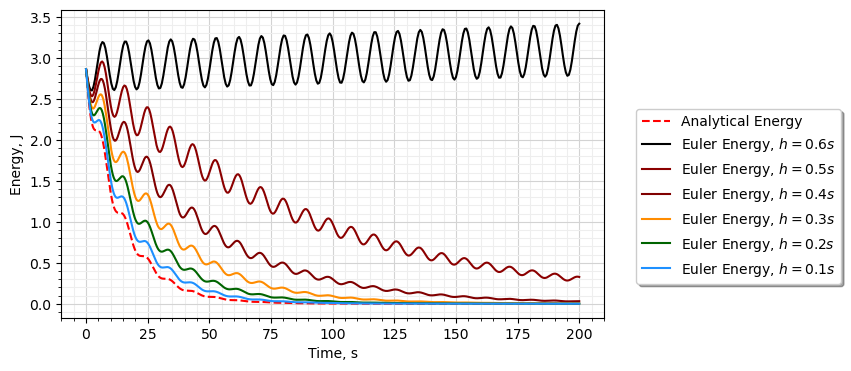

In [4]:
# We define the array for our h values we wish to show
h_energy = np.array([0.6, 0.5, 0.4, 0.3, 0.2, 0.1])

# Creates the figure and axis
fig, ax = plt.subplots(figsize = (7,4))

# Creates a few arrays that we will need to plot, such as the euler and analytical energies and time arrays for each
euler_energy = np.zeros(len(h_energy))
time_energy = np.zeros(len(h_energy))
analytical_energy = euler(0.01)[4]
time_analytical = euler(0.01)[3]

# Plots the analytical energy against time
ax.plot(time_analytical, analytical_energy, color = 'red', linestyle = '--', label = 'Analytical Energy')

# Sets a few colours for us to loop through to represent each step size
colours = ['black', 'darkred', 'maroon', 'darkorange', 'darkgreen', 'dodgerblue']

# Loop over the h array we have defined above
for i in range(len(h_energy)):

    # Fill in the euler energy and time array for each step size for plotting
    euler_energy = euler(h_energy[i])[2]
    time_energy = euler(h_energy[i])[3]

    # Plotting the above arrays on the same axis
    ax.plot(time_energy, euler_energy, color = colours[i], label = rf'Euler Energy, $h = {h_energy[i]}s$')

# Sets a legend to the right of the figure
ax.legend(bbox_to_anchor = (1.45, 0.7), fancybox = True, shadow = True)

# Sets x and y labels
ax.set_xlabel('Time, s')
ax.set_ylabel('Energy, J')

# Sets a major and minor grid for clarity
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 3 - Energy of the analytical solution versus that given by the Euler method for a range of step sizes.}$

As is now hopefully evident, the energy of the Euler method is always higher than that of the analytical solution. Even as $h$ becomes very small, the energy of the Euler method asymptotes the analytical method's energy from above, and hence will never conserve energy. At higher $h$, we can see that the energy does not even decay - instead becoming exponentially larger. This is an obvious weakness of the standard Euler method.

<b> [Go Back To Contents](#Contents)

***

## 4 - The Improved Euler Method
### 4.1 - What is the Improved Euler Method?

Conceptually, the Improved Euler method is identical to the Euler method, except we will implement an additional term from the Taylor expansion to improve the precision of each time step we make. Therefore, we find ourselves with the following equations:

$x_{i+1} = x_{i} + hv_{i} + \frac{h^{2}}{2}a_{i}$

$v_{i+1} = v_{i} + ha_{i}$

$a_{i} = -\frac{k}{m}x_{i} - \frac{b}{m}v_{i}$

As is evident, the only equation that has changed is the first of the three, with the addition of the $h^{2}$ term. As a result of this extra term, the Improved-Euler method is a second order term, and hence has uncertainty proportional to $h^{3}$, which for a small step should theoretically produce a much smaller uncertainty than the Euler method.

### 4.2 - The Method and it's Quality as a Function of step, h

We will complete the same analysis as we did for the Euler method, showing a few different plots at different steps to highlight how the solution improves with decreasing step width, $h$.

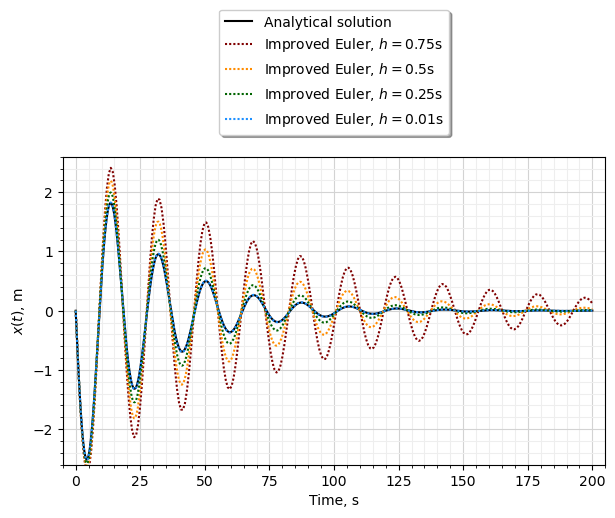

In [5]:
def imp_euler(h):
    '''
    Runs our Improved Euler method of numerical integration, and plots every 10 values of h for the user to
    see how the approximation improves as h gets smaller.

    VARIABLES
    --------------------------
    n : INTEGER - number of steps needed
    x : NUMPY ARRAY - values of amplitude of oscillation
    v : NUMPY ARRAY - values of velocity of oscillation
    a : FLOAT - acceleration at a time t
    h : FLOAT - step, in s
    residual : NUMPY ARRAY - values of difference between analytical solution and numerical method
    max_error : FLOAT - maximum value of the residual array

    RETURNS
    --------------------------
    max_error
    '''
    
    # We will define the number of steps that we need to take based on our values of T and h:
    n = int(T / h)
    x = np.zeros(n)
    v = np.zeros(n)

    # Let us also define initial values for x and v at t = 0
    x[0] = 0 #m
    v[0] = -1 #m/s

    for i in range(len(x) - 1):
        # Finds acceleration for particular i
        a = (-(k / m) * x[i]) - ((b / m) * v[i])

        # Finds the corresponding v and x value and replaces the zero with that value in the x and v arrays
        x[i+1] = x[i] + (h * v[i]) + (((h ** 2) / 2) * a)
        v[i+1] = v[i] + (h * a)

    # Creates a time array and then uses it find an array for the analytically gained solution to plot our Improved Euler method against
    time = np.linspace(0, T, n)
    model_sol = analytical_sol(time)
    
    # Calculates the difference between the Improved Euler numerical method value and the analytical solution value
    residual = np.abs(x - model_sol)
    
    # Takes the maximum error (i.e the biggest difference between a real and Improved Euler method value), which we will use to
    # quantify the efficacy of each method
    max_error = np.max(residual)

    return max_error, x, time

# Creates a new array made up of the maximum value of error for each value of h by calling our imp_euler function
imp_euler_error = np.array([imp_euler(i)[0] for i in h_array])

# Creates arrays for a few quantities we will need to plot the graph
imp_euler_x = []
imp_euler_h = []
imp_euler_time = []

# There are many h values - we want to select just a few to show
for i in [0.75, 0.5, 0.25, 0.01]:
    imp_euler_x.append(imp_euler(i)[1])
    imp_euler_h.append(i)
    imp_euler_time.append(imp_euler(i)[2])

# Calls the function to plot the graph with all given paramters
x_plotter(imp_euler_time, imp_euler_x, imp_euler_h, 'Improved Euler')

$\textit{Figure 4 - Improved-Euler method solution versus the analytical solution for a range of step sizes.}$

Looking at figure 4, it is clear to see that for the same $h$, the Improved Euler method is providing a much closer fit to the analytical solution - the extra term in the calculation of each value of $x(t)$ has a positive impact on the quality of the results. In our range of $h$, we can't even see the method causing a divergence - but based on the progression of the solution quality with step, we can infer that this will indeed still happen, just at a larger value of $h$. We can immediately see therefore that the Improved Euler method does in fact earn its name, and outclasses the Euler method.

### 4.3 - Error in the Improved-Euler Method

Let us now investigate how the error between the analytical solution and the Improved Euler numerical solution varies as a function of h, similar to that done for the Euler method in figure 2. 

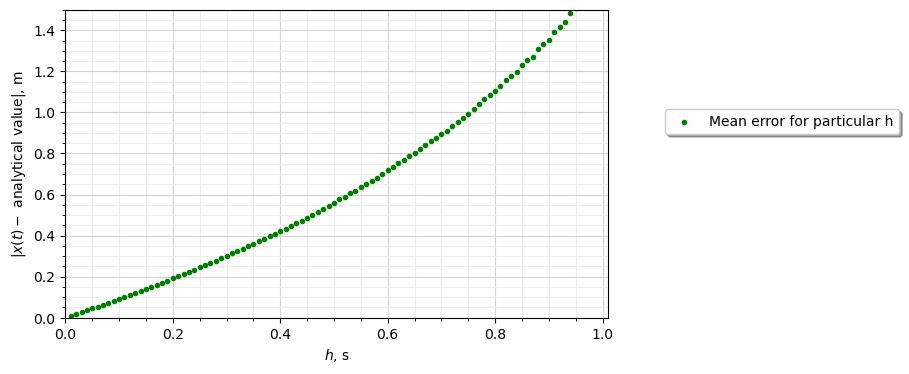

In [6]:
# Creates the figure and axis
fig, ax = plt.subplots(figsize = (7, 4))

# Plots the residuals against time step
ax.scatter(h_array, imp_euler_error, marker = '.', color = 'green', label = 'Mean error for particular h')

# Sets axis labels and x and y limits of the plot
ax.set_xlabel(r'$h$, s')
ax.set_ylabel(r'$|x(t) -$ analytical value$|$, m')
ax.set_xlim(0, 1.01)
ax.set_ylim(0, 1.5)

# Sets the legend and its location, and creates a grid
ax.legend(bbox_to_anchor = (1.55, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 5 - Error in the Improved Euler method (residual) as a function of step size}$

We can clearly see that the error in the Improved Euler method is much smaller compared to the error in the Euler method for indentical step. The Improved Euler method still suffers however as it is an energy increasing method like its predecessor, and so it will still provide an increasingly large error for large step sizes. 

<b> [Go Back To Contents](#Contents)

***

## 5 - The Verlet Method
### 5.1 - What is the Verlet Method?

The Verlet method of numerical integration has a very different approach to the Euler methods, and is easily the most conceptually challenging method to derive of the four we will study. Let's start by considering the $\textit{centred}$ derivative of $x(t)$, where instead of considering the difference between a point at $t$ and one at $t+h$, we consider the difference between a point at $t-h$ and one at $t+h$, with a time step of $2h$. In the limit of $h \to 0$, this is identical to the first derivative of $x(t)$, i.e 

\begin{equation*}
\frac{dx(t)}{dt} = \lim_{h\to 0} \left(\frac{x(t+h) - x(t-h)}{2h}\right). \tag{7}
\end{equation*}

We can then expand $x(t+h)$ and $x(t-h)$ as Taylor expansions (as we are working in the limit of $h \to 0$),

\begin{equation*}
x(t+h) = x(t) + h\frac{dx(t)}{dt} + \frac{1}{2}h^{2}\frac{d^{2}x(t)}{dt^{2}} + \frac{1}{6}h^{3}\frac{d^{3}x(\zeta)}{dt^{3}} \tag{8}
\end{equation*}

\begin{equation*}
x(t-h) = x(t) - h\frac{dx(t)}{dt} + \frac{1}{2}h^{2}\frac{d^{2}x(t)}{dt^{2}} - \frac{1}{6}h^{3}\frac{d^{3}x(\zeta)}{dt^{3}} \tag{9}
\end{equation*}

where $t-h < \zeta < t+h$. Now, let's subtract equation $(9)$ from $(8)$:

\begin{equation*}
x(t+h) - x(t-h) = 2h\frac{dx(t)}{dt} + \frac{1}{3}h^{3}\frac{d^{3}x(\zeta)}{dt^{3}}. \tag{10}
\end{equation*}

We can re-arrange equation $(10)$ to solve for $\frac{dx(t)}{dt}$, which we know to be equal to $v(t)$, and so we have

\begin{equation*}
v(t) = \frac{x(t+h)-x(t-h)}{2h} + \frac{1}{6}h^{2}\frac{d^{3}x(\zeta)}{dt^{3}}. \tag{11}
\end{equation*}

We may complete a similar exercise for the second derivative of $x(t)$, which we know to be $a(t)$, which gives us

\begin{equation*}
a(t) = \frac{x(t+h)-x(t-h) - 2x(t)}{2h} - \frac{1}{12}h^{2}\frac{d^{4}x(\zeta)}{dt^{4}}. \tag{12}
\end{equation*}

In terms of something we can actually program in this notebook, equations $(11)$ and $(12)$ can be rewritten, acknowledging that $x(t-h)$, $x(t)$ and $x(t+h)$ are equivalent to $x_{i-1}$, $x_{i}$ and $x_{i+1}$ respectively, to give

\begin{equation*}
v_{i} = \frac{x_{i+1} - x_{i-1}}{2h} + \mathcal{O}(h^{2}) \tag{13}
\end{equation*}

and

\begin{equation*}
a_{i} = \frac{x_{i+1} + x_{i-1} - 2x_{i}}{h^{2}} + \mathcal{O}(h^{2}), \tag{14}
\end{equation*}

where the $\mathcal{O}(h^{2})$ notation shows us the order of the local uncertainty at each step. It is possible to rearrange equation $(14)$ to make $x_{i+1}$ the subject, which yields

\begin{equation*}
x_{i+1} = 2x_{i} - x_{i-1} + h^{2}a_{i} + \mathcal{O}(h^{4}), \tag{15}
\end{equation*}

which we can now see is quartic in $h$, meaning this method is much more accurate than even the Improved-Euler method. Knowing from before that $a_{i} = -\frac{k}{m}x_{i} - \frac{b}{m}v_{i}$, we can combine this along with equations $(13)$, $(14)$ and $(15)$ (which are individually unsolvabale) to finally give us

\begin{equation*}
x_{i+1} = \frac{2(2m-kh^{2})}{bh+2m}x_{i} + \frac{bh-2m}{bh+2m}x_{i-1}. \tag{16}
\end{equation*}

### 5.2 - The Method and it's Quality as a Function of step, h

It is worth noting that from equation $(16)$ we can see that this method is not $\textit{self-starting}$ - the Verlet method necessitates the use of another method to provide it with the first two values of $x$ to function. Out of the two methods we have met previously, the Euler and Improved Euler, it seems appropriate to choose the Improved-Euler method to give the Verlet method its second value needed to start, given that it is by far the most efficient of the two. As before we will display several plots of the analytical solution compared to the Verlet approximated solution for different steps to show how it improves in accuracy as step decreases.

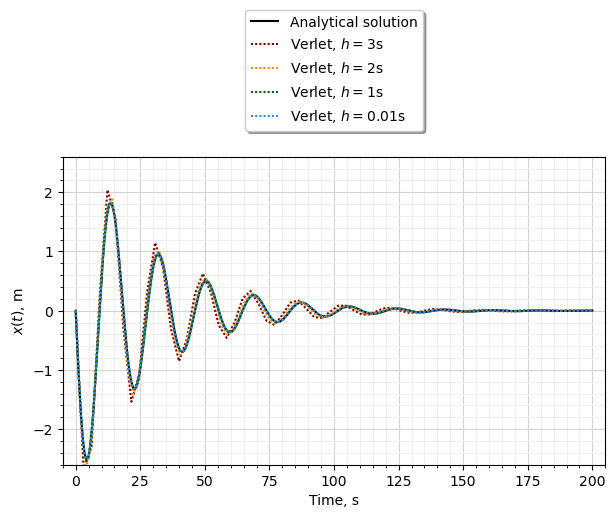

In [7]:
def verlet(h, damp):
    '''
    Runs our Verlet method of numerical integration, and plots every 10 values of h for the user to see how the
    approximation improves as h gets smaller.

    VARIABLES
    --------------------------
    n : INTEGER - number of steps needed
    x : NUMPY ARRAY - values of amplitude of oscillation
    v_0 : FLOAT - value of velocity of oscillation at t = 0
    a : FLOAT - acceleration at a time t
    h : FLOAT - step, in s
    damp : FLOAT - a pass through for custom damping constant
    residual : NUMPY ARRAY - values of difference between analytical solution and numerical method
    max_error : FLOAT - maximum value of the residual array

    RETURNS
    --------------------------
    max_error
    '''
    
    # We will define the number of steps that we need to take based on our values of T and h:
    n = int(T / h)

    # We need only define an array for x now because of how the Verlet method works
    x = np.zeros(n)

    # Let us also define initial values for x and v at t = 0
    x[0] = 0 #m
    v_0 = -1.0 #m/s

    # As we cannot use the Verlet method for the first step, we will use the Improved Euler method once.
    a = (-(k / m) * x[0]) - ((damp / m) * v_0)
    x[1] = x[0] + (h * v_0) + (((h ** 2) / 2) * a)

    # We define a few constants for the calculations that follow
    D = (2 * m) + (damp * h)
    A = (2 * ((2 * m) - (k * pow(h, 2)))) / D
    B = ((damp * h) - (2 * m)) / D

    for i in range(len(x) - 2):
        # Finds the corresponding x value and replaces the zero with that value in the x array
        x[i+2] = (A * x[i+1]) + (B * x[i])
        
    # Creates a time array and then uses it find an array for the analytically gained solution to plot our Verlet method against
    time = np.linspace(0, T, n)
    model_sol = analytical_sol(time)

    # Calculates the difference between the Verlet numerical method value and the analytical solution value
    residual = np.abs(x - model_sol)
    
    # Takes the maximum error (i.e the biggest difference between a real and Verlet method value), which we will use to
    # quantify the efficacy of each method
    max_error = np.max(residual)

    return max_error, x, time

# Creates a new array made up of the maximum value of error for each value of h by calling our verlet function
verlet_error = np.array([verlet(i, b)[0] for i in h_array])

# Creates arrays for a few quantities we will need to plot the graph
verlet_x = []
verlet_h = []
verlet_time = []

# There are many h values - we want to select just a few to show
for i in [3, 2, 1, 0.01]:
    verlet_x.append(verlet(i, b)[1])
    verlet_h.append(i)
    verlet_time.append(verlet(i, b)[2])

# Calls the function to plot the graph with all given paramters
x_plotter(verlet_time, verlet_x, verlet_h, 'Verlet')

$\textit{Figure 6 - The Verlet method solution against the analytical solution for a range of step sizes.}$

The Verlet method appears so effective that even with a step of $h = 1$s the solution is nearly exact, compared to the Euler and Improved Euler methods which were both still far from the exact solution at that point. This is without doubt the most effective method we have seen thus far.

### 5.3 - Error in the Verlet Method

Now we will again investigate the error - this time for the Verlet method. To do this we do as we have done previously; find the residual between the analytical solution and the Verlet method solution for each step, find the maximum of this and then plot it as a function of step.

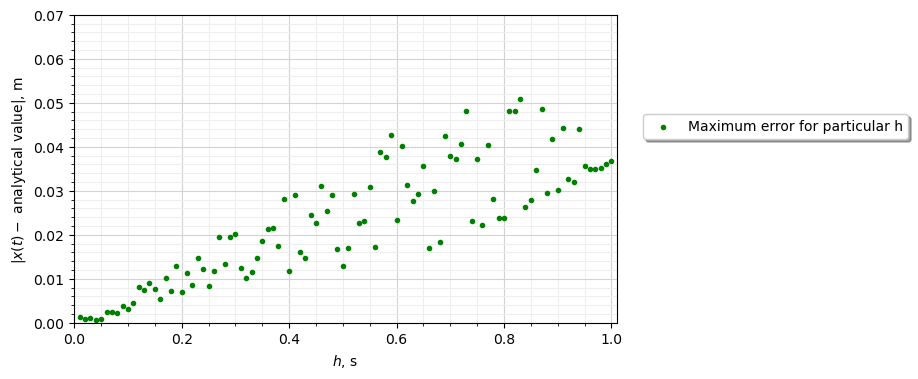

In [8]:
# Creates the figure and axis
fig, ax = plt.subplots(figsize = (7, 4))

# Plots the residuals against time step
ax.scatter(h_array, verlet_error, marker = '.', color = 'green', label = 'Maximum error for particular h')

# Sets axis labels and x and y limits
ax.set_xlabel(r'$h$, s')
ax.set_ylabel(r'$|x(t) -$ analytical value$|$, m')
ax.set_xlim(0, 1.01)
ax.set_ylim(0, 0.07)

# Sets legend and its location, as well as putting a grid on the plot
ax.legend(bbox_to_anchor = (1.55, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 7 - Error (residual) in the Verlet method as a function of step size.}$

As we could have guessed, the Verlet method has very small error - for $0.01<h<1.0$, we can see from Figure 8, the maximum difference between the analytical solution and the Verlet solution is only of order $0.01$. 

<b> [Go Back To Contents](#Contents)

***

## 6 - The Euler-Cromer Method
### 6.1 - What is the Euler-Cromer Method?

Recall back to [section 3.1](#3.1---What-is-the-Euler-Method?), where we introduced the Euler method as a first order, explicit method of numerical integration. We used the previous terms of $v$ to calculate the new term, which creates an artificial energy increase that stacks up each term. To get around this problem and conserve enregy each term, we can make a very small amendment to the original Euler method, to create the Euler-Cromer (or semi-implicit Euler) method. Instead of $x_{i+1} = x_{i} + hv_{i}$, we replace $v_{i} \to v_{i+1}$. This gives us $x_{i+1} = x_{i} + hv_{i+1}$. If we were to expand the energy associated with this equation, we would find that it oscillates about the mean, but averages out to conserve energy - this makes the Euler-Cromer method a $\textit{symplectic}$ integrator.

### 6.2 - The Method and it's Quality as a Function of step, h

Because we calculate $x_{i+1}$ using $v_{i+1}$, we have a phase shift of one time step between the analytical solution and the Euler-Cromer method's solution, which of course gets smaller as $h$ gets closer to 0. As previously, we will show the model for several different values of $h$.

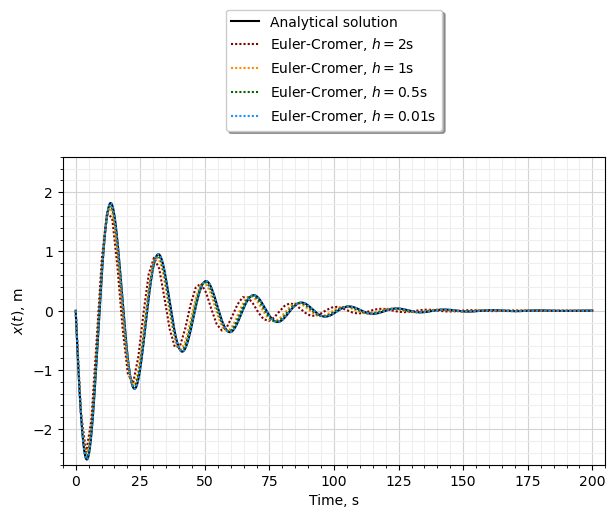

In [9]:
def euler_cromer(h):
    '''
    Runs our Euler method of numerical integration, and plots every 10 values of h for the user to see how the
    approximation improves as h gets smaller.

    VARIABLES
    --------------------------
    n : INTEGER - number of steps needed
    x : NUMPY ARRAY - values of amplitude of oscillation
    v : NUMPY ARRAY - values of velocity of oscillation
    a : FLOAT - acceleration at a time t
    h : FLOAT - step, in s
    residual : NUMPY ARRAY - values of difference between analytical solution and numerical method
    max_error : FLOAT - maximum value of the residual array

    RETURNS
    --------------------------
    max_error
    '''
    
    # We will define the number of steps that we need to take based on our values of T and h:
    n = int(T / h)

    # Must define both x and v arrays to use for the iterations we will perform
    x = np.zeros(n)
    v = np.zeros(n)

    # Let us also define initial values for x and v at t = 0
    x[0] = 0 #m
    v[0] = -1 #m/s

    for i in range(len(x) - 1):
        # Finds acceleration for particular i
        a = (-(k / m) * x[i]) - ((b / m) * v[i])

        # Finds the corresponding v and x value and replaces the zero with that value in the x and v arrays
        v[i+1] = v[i] + (h * a)
        x[i+1] = x[i] + (h * v[i+1])

    # Creates a time array and then uses it find an array for the analytically gained solution to plot our Euler-Cromer method against
    time = np.linspace(0, T, n)
    model_sol = analytical_sol(time)

    # Calculates the difference between the Euler-cromer numerical method value and the analytical solution value
    residual = np.abs(x - model_sol)
    
    # Takes the maximum error (i.e the biggest difference between a real and E-C method value), which we will use to
    # quantify the efficacy of each method
    max_error = np.max(residual)

    return max_error, x, time

# Creates a new array made up of the maximum value of error for each value of h by calling our euler_cromer function
euler_cromer_error = np.array([euler_cromer(i)[0] for i in h_array])

# Creates arrays for a few quantities we will need to plot the graph
ec_x = []
ec_h = []
ec_time = []

# There are many h values - we want to select just a few to show the variation in solution quality
for i in [2, 1, 0.5, 0.01]:
    ec_x.append(euler_cromer(i)[1])
    ec_h.append(i)
    ec_time.append(euler_cromer(i)[2])

# Calls the function to plot the graph with all given paramters
x_plotter(ec_time, ec_x, ec_h, 'Euler-Cromer')

$\textit{Figure 8 - The Euler-Cromer method against the analytical solution for a range of step sizes.}$

The phase shift, even at higher $h$, is still relatively small and makes little difference to the Euler-Cromer method's attempt and providing a solution.

### 6.3 - Error in the Euler-Cromer Method

Once again as we have done before we will plot the maximum residual for each time step to see how the accuracy of the Euler-Cromer method increases with decreasing step.

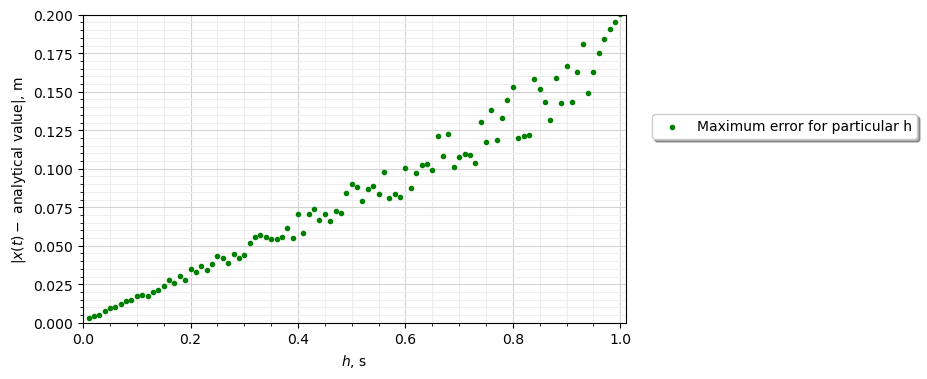

In [10]:
# Creates the figure and axis
fig, ax = plt.subplots(figsize = (7, 4))

# Plots the residuals against time step
ax.scatter(h_array, euler_cromer_error, marker = '.', color = 'green', label = 'Maximum error for particular h')

# Sets axis labels and sets x and y limits on the plot
ax.set_xlabel(r'$h$, s')
ax.set_ylabel(r'$|x(t) -$ analytical value$|$, m')
ax.set_xlim(0, 1.01)
ax.set_ylim(0, 0.2)

# Sets the legend and it location, and puts a grid on the plot
ax.legend(bbox_to_anchor = (1.55, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 9 - Error (residual) in the Euler-Cromer method as a function of step size.}$

The error here is distinctly linear, but with less spread as $h$ decreases and the model becomes more precise. It is also important to note the fact that errors here are much lower than for the other Euler methods, but larger than for the Verlet method.

<b> [Go Back To Contents](#Contents)

***

## 7 - Analysis of the Methods

To compare the four methods directly, we can plot the maximum residuals of each time step for each method on the same plot, to visualise the precision of each method working in the same range of time step, $h$.

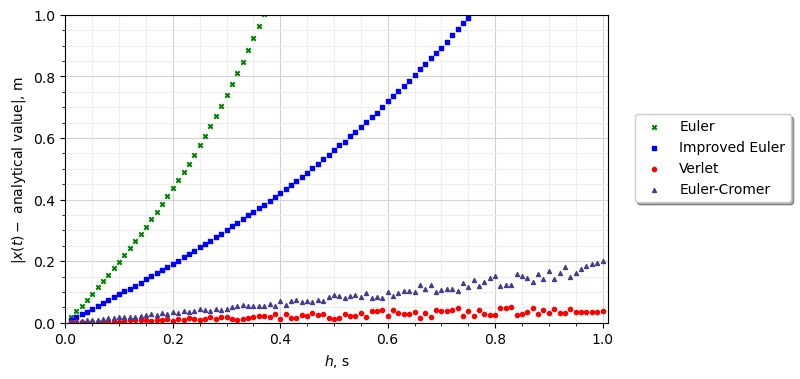

In [11]:
# Creates a figure and axis to work on
fig, ax = plt.subplots(figsize = (7, 4))

# Plots all the residual data from all four methods against time step
ax.scatter(h_array, euler_error, marker = 'x', s = 10, color = 'green', label = 'Euler')
ax.scatter(h_array, imp_euler_error, marker = 's', s = 8, color = 'blue', label = 'Improved Euler')
ax.scatter(h_array, verlet_error, marker = '.', color = 'red', label = 'Verlet')
ax.scatter(h_array, euler_cromer_error, marker = '^', s = 8, color = 'darkslateblue', label = 'Euler-Cromer')

# Sets axis labels and x and y limits
ax.set_xlabel(r'$h$, s')
ax.set_ylabel(r'$|x(t) -$ analytical value$|$, m')
ax.set_xlim(0, 1.01)
ax.set_ylim(0, 1)

# Sets legend and location, as well as putting a grid on the plot
ax.legend(bbox_to_anchor = (1.35, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 10 - Maximum error as a function of time step for each numerical integration method.}$

We can also plot the analytical solution along with each method's solution for a constant step, let's say $h = 0.5$, to further visualise the differences between each method.

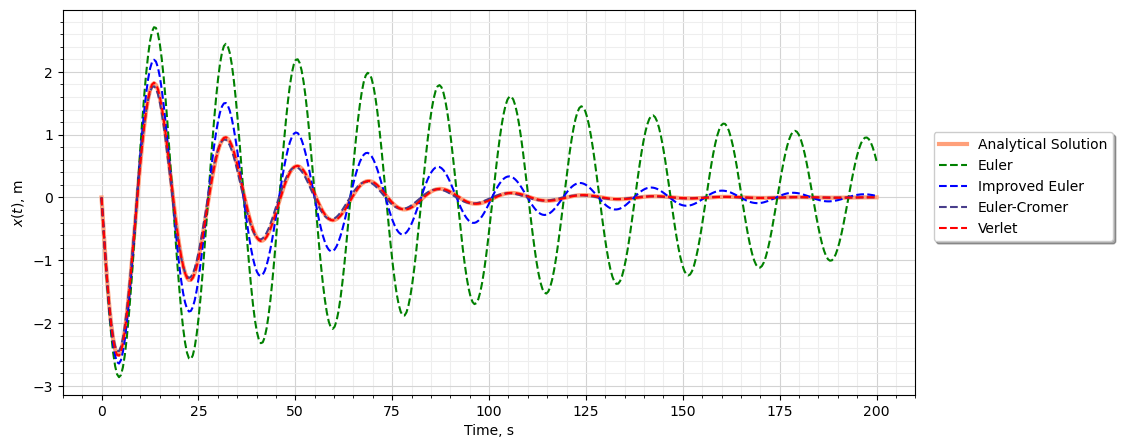

In [12]:
# Collects the data x(t) from each model with a step of 0.5n
euler_plot = euler(0.5)[1]
imp_euler_plot = imp_euler(0.5)[1]
verlet_plot = verlet(0.5, b)[1]
euler_cromer_plot = euler_cromer(0.5)[1]

# Finds time array and analytical solution at time t
time = euler(0.5)[3]
model_sol = analytical_sol(time)

# Creates a figure and axis
fig, ax = plt.subplots(figsize = (11, 5))

# Plots the data over time
ax.plot(time, model_sol, color = 'lightsalmon', label = 'Analytical Solution', linewidth = 3)
ax.plot(time, euler_plot, color = 'green', linestyle = '--', label = 'Euler')
ax.plot(time, imp_euler_plot, color = 'blue', linestyle = '--', label = 'Improved Euler')
ax.plot(time, euler_cromer_plot, color = 'darkslateblue', linestyle = '--', label = 'Euler-Cromer')
ax.plot(time, verlet_plot, color = 'red', linestyle = '--', label = 'Verlet')

# Sets axis labels

ax.set_xlabel('Time, s')
ax.set_ylabel(r'$x(t)$, m ')

# Sets legend and location, as well as putting a grid on the plot
ax.legend(bbox_to_anchor = (1.24, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 11 - All numerical methods shown against the analytical solution at a constant step size of h = 0.5s.}$

It is quite clear that the best method for accuracy based on the residual analysis is the Verlet method. This was also clear to see by how even at higher step ($h \approx 1$), the Verlet method provided a solution very close to the real one. With that in mind, let us move on to investigate how the damping constant $b$ may change the shape of the solution.

<b> [Go Back To Contents](#Contents)

***

## 8 - Damping and its Effect on the Solution to the Oscillator Equation

As discussed in section 2, the value of the damping constant, $b$, determines the solution to the equation $(1)$, with a value $b_{crit} = \sqrt{4km}$ corresponding to a critically damped system (returning to equilibrium in the quickest time), and $b > b_{crit}$ and $b < b_{crit}$ referring to heavy and light damping respectively. We have seen how a lightly damped system acts throughout this notebook, as it was the condition we chose whilst studying the numerical integration methods. Now, we will investigate systems without damping, and with different levels of damping to illustrate the different solutions to our original problem.

### 8.1 - Zero Damping Visualised

First, we will set $b = 0$kgs$^{-1}$ in equation $(1)$, i.e no damping at all. Let's use the Verlet method with $h = 0.005$s (as we have seen that small step size is much better of a fit, and plot what we see:

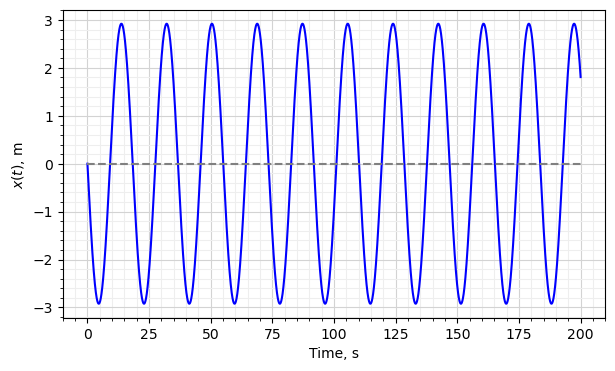

In [13]:
# Creates a figure and axis
fig, ax = plt.subplots(figsize = (7, 4))

# Defines a new time
runtime = euler(0.005)[3]

# Plots the oscillations with zero damping and a horizontal dashed line at equilibrium point
ax.plot(runtime, verlet(0.005, 0)[1], color = 'blue')
ax.hlines(y = 0, xmin = np.min(runtime), xmax = np.max(runtime), colors = 'grey', linestyles = '--')

# Sets x and y labels
ax.set_xlabel('Time, s')
ax.set_ylabel(r'$x(t)$, m ')

# Sets legend and location, as well as putting a grid on the plot
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 12 - The system for zero damping.}$

As we might expect, the lack of a damping term results in the oscillations never reducing in amplitude, and so they continue indefinitely.

### 8.2 - Damping Conditions Visualised

Now, let's investigate damping for three different conditions: light damping (detailed in section 2.1), critical damping (section 2.3) and heavy damping (section 2.2).

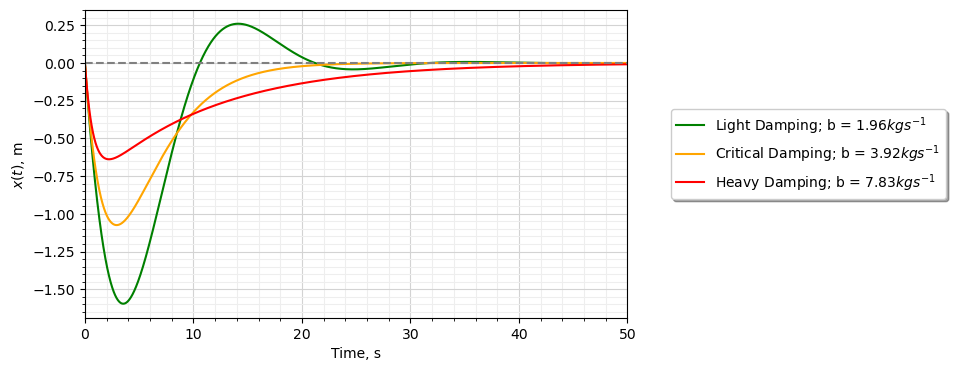

In [14]:
# Creates a figure and axis
fig, ax = plt.subplots(figsize = (7, 4))

# Defines the damping constant for the case of light, critical and heavy damping
b_crit = np.sqrt(4 * k * m)
b_damp = b_crit / 2
b_heavy = 2 * b_crit
units = r'$kgs^{-1}$'

# Plots both the oscillations at different damping constants using Verlet method and a horizontal line at equilibrium point
ax.plot(runtime, verlet(0.005, b_damp)[1], color = 'green', label = rf'Light Damping; b = {b_damp:.3g}{units}')
ax.plot(runtime, verlet(0.005, b_crit)[1], color = 'orange', label = rf'Critical Damping; b = {b_crit:.3g}{units}')
ax.plot(runtime, verlet(0.005, b_heavy)[1], color = 'red', label = rf'Heavy Damping; b = {b_heavy:.3g}{units}')
ax.hlines(y = 0, xmin = np.min(runtime), xmax = np.max(runtime), colors = 'grey', linestyles = '--')

# Sets x and y labels
ax.set_xlabel('Time, s')
ax.set_ylabel(r'$x(t)$, m ')
ax.set_xlim(xmin = 0, xmax = 50) 

# Sets legend and location, as well as putting a grid on the plot
ax.legend(bbox_to_anchor = (1.6, 0.7), fancybox = True, shadow = True)
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 13 - The system for light damping, critical damping and heavy damping.}$

As might be expected, we can see for the light damping curve, there is more than one full oscillation before the system returns to equilibrium, as the oscillation ($\omega_0^{2}$) term is dominant. Contrastingly, the heavy damping curve shows a peak amplitude with a smaller magnitude and a slow decay to equilibrium, as the damping ($\frac{\gamma^{2}}{4}$) term is dominant. The critical damping term is a quick descent to equilibrium as expected, as neither the oscillation or the damping term dominate the system.

### 8.3 - The Quality Factor

Before we move on from damping, let's discuss the quality factor, $Q$. The quality factor is a dimensionless variable that tells us about how good the oscillator is at oscillating, and is defined as $Q = \frac{\omega_{0}}{2\gamma}$, where $\omega_{0}$ and $\gamma$ are the natural frequency and damping ratio as defined back in [section 2](#2.1---Light-Damping). Therefore, analysing the value of $Q$ can tell us about whether the system is in light, critical or heavy damping.

If the system is critically damped, i.e $\omega_{0} = \gamma$, then $Q = \frac{1}{2}$. Therefore if $Q < \frac{1}{2}$ then the system is heavily damped, and if $Q > \frac{1}{2}$ the system is lightly damped. For our values of $k$, $m$ and the arbitrarily chosen $b = 0.4$kgs$^{-1}$ that we discussed in sections 3-7, we yield a value of $Q = 4.89$, which is firmly above $\frac{1}{2}$, placing us in light damping as we would expect.

The plot in Figure 13 shows our system critically damped, and then subject to a damping constant both double or half the critical value, yielding heavy and light damping respectively. We can confirm that these are indeed the correct conditions by analysing the value of $Q$ for each. As expected for the critically damped curve shown in orange in Figure 13 we yield $Q = \frac{1}{2}$, for the lightly damped curve shown in green we yield $Q = 1$ and for the heavily damped curve shown in red we get $Q = \frac{1}{4}$. These suit the conditions we outlined earlier in this section! As a final note, for a system with damping constant $b \to 0$ such as that shown in Figure 12, we have $Q \to \infty$ (or simply undefined at $b = 0$) as the oscillations never cease.

<b> [Go Back To Contents](#Contents)

***

## 9 - External Forces

<div class="alert alert-block alert-info">
<b>Disclaimer:</b> 
While trying to compute this section using the version of Verlet that we have used before in section 5, it would not produce resonance at the correct frequency. For my values of k and m, this is approximately 0.34 rads$^{-1}$, with the method in section 5 instead finding resonance later, with no apparent reason as to why this was happening. Despite hours of trying to fix this, it would not work. I decided to do some research into the Verlet method to see if this was a common occurence and happened upon an alternative form of the final expression for $x[i+1]$:

\begin{equation*}
x[i+1] = 2x[i] - x[i-1] + a[i]h^{2} \tag{17}
\end{equation*}

which can be derived simply by considering equations $(8)$ and $(9)$ and solving for $x(t+h)$. This alternative gave me much more success in finding resonance at the correct frequency and so for consistency I have used it in the whole of section 9, but have left section 5 (and the method explicity described to us in the project brief) unedited. I am aware that this creates an inconsistency however it produces the desired results for resonance, which I feel is important to show.
</div>

Up to this point, we have considered a system with zero external force; that is $F(x) = 0$ within equation $(1)$. We will now consider the case where this is no longer true, and we no longer have an analytical solution to compare to.



### 9.1 - Constant, Sudden Pushing Force

First, we will consider a 'push' onto the system at different times. This means a constant, sudden force is applied at a single time (so a single step), which will interupt the flow of the system. We effectively give it new intitial conditions in the form of an increased acceleration for one single step - but somewhere after $t = 0$. We will, as in previous sections, pick a constant damping constant of $b = 0.4 kgs^{-1}$. This 'push' will be instantaneous, i.e it is provided at a single time $\tau$ which we are free to change. We can also change the direction and magnitude of the pushing force $F(x) = F$ (as it is a constant in this case and therefore has no dependency on $x$). To illustrate this, let's try a few different scenarios:

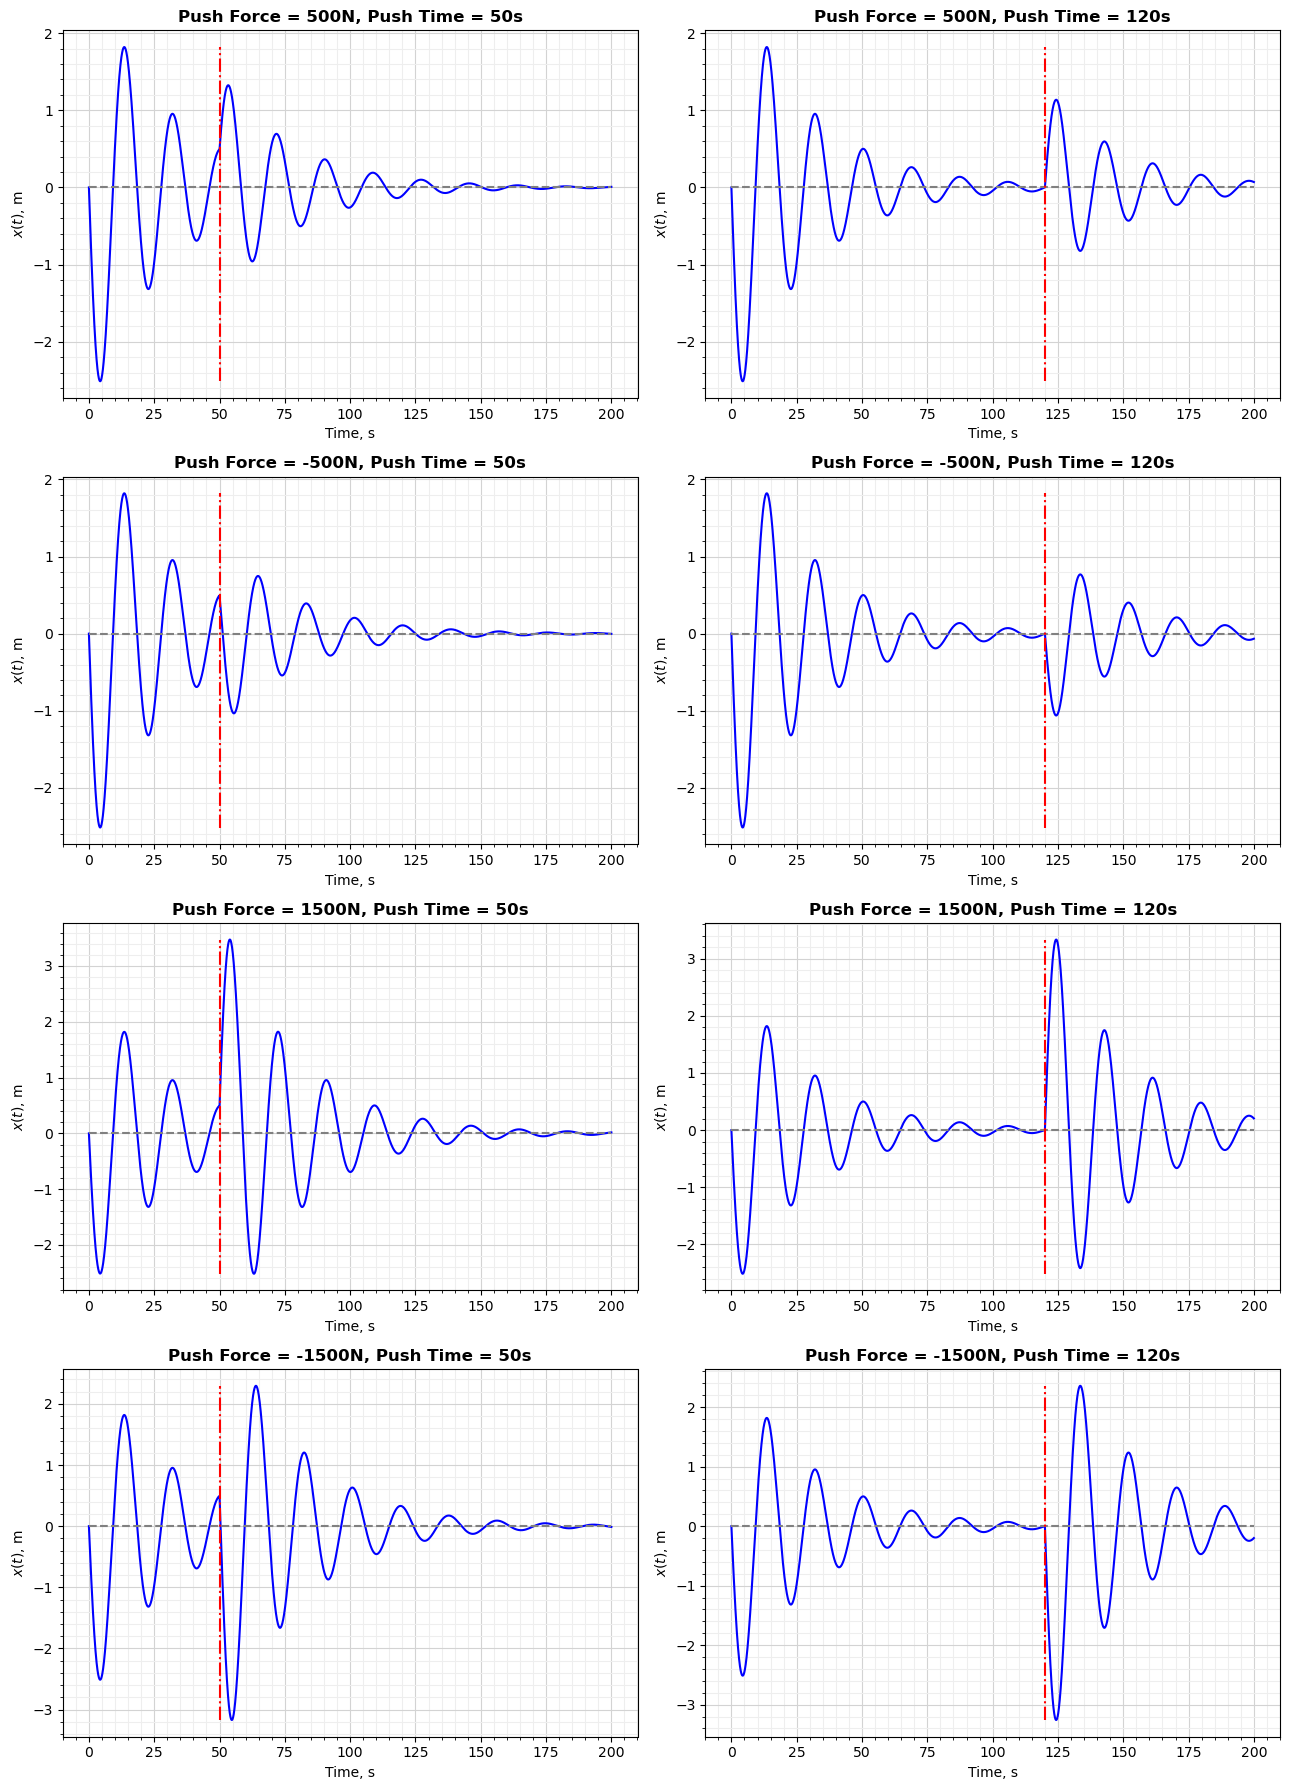

In [15]:
def accel(x, v, time, push, pushtime):
    '''
    Finds the acceleration for a given x, v and time value

    VARIABLES
    --------------------
    x : FLOAT - value of amplitude at a certain time
    v : FLOAT - value of velocity at a certain time
    time : FLOAT - value of time
    push : FLOAT - magnitude of pushing force
    pushtime : FLOAT - time at which the sudden force is applied

    '''

    # Returns acceleration normally for every time other than the push time where the push is applied
    if time == pushtime:
        return ((-k * x) - (b * v) + push) / m # Our push for one step
    else:
        return ((-k * x) - (b * v)) / m


def constant_force(h, pushtime, push):
    '''
    Calculates the arrays for x, v and a using the verlet method for a particular
    step, h, and a push applied at t = pushtime.

    VARIABLES
    --------------------
    n : FLOAT - number of steps needed
    h : FLOAT - step size, s
    x : NUMPY ARRAY - amplitude of oscillations
    v : NUMPY ARRAY - velocity of oscillations
    a : NUMPY ARRAY - acceleration of oscillations
    push : FLOAT - magnitude of sudden pushing force
    pushtime : FLOAT - time at which pushing force is applied

    RETURNS
    --------------------
    x - as above
    '''

    # Define number of steps as we have done before
    n = int(T / h)

    # Define our arrays for amplitude, velocity and acceleration of the wave
    x = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)

    # Initial conditions for each array
    x[0] = 0 #m
    v[0] = -1.0 #m/s
    a[0] = accel(x[0], v[0], 0, push, pushtime)

    # Loop to fill the x array
    for i in range(len(x) - 1):

        # Initial step using improved euler as we've done before  
        if i == 0:
            x[i+1] = x[i] + (v[i] * h) + (0.5 * a[i] * (h**2))

        # Modified Verlet method to calculate x at every other time after i = 0.
        else:
            x[i+1] = (2 * x[i]) - x[i-1] + (a[i] * (h**2))

        # Updates a and v for use in the next iteration
        a[i+1] = accel(x[i+1], v[i], (i * h), push, pushtime)
        
        v[i+1] = v[i] + ((a[i] + a[i+1]) * h * 0.5)
    
    return x

# Define some arbitrary push times for variation
pushtimes = [50, 120]

# Define some arbitrary forces for variation
forces = [500, -500, 1500, -1500]

# Define the figure and axes for the plots
fig, axs = plt.subplots(4, 2, figsize = (13, 18))

# Loops through each row and column using force and pushtimes array to make each plot
for i in range(len(pushtimes)):
    for j in range(len(forces)):

        # Defines the x using the constant force function abvoe
        x = constant_force(0.005, pushtimes[i], forces[j])

        # Plots the oscillations against time
        axs[j][i].plot(runtime, x, color = 'blue')

        # Plots a horizontal line at equilibrium point and a vertical line at the push time
        axs[j][i].hlines(y = 0, xmin = np.min(runtime), xmax = np.max(runtime), colors = 'grey', linestyles = '--')
        axs[j][i].vlines(x = pushtimes[i], ymin = np.min(x), ymax = np.max(x), colors = 'red', linestyles = '-.')

        # Sets title and axis labels for clarity and to distinguish each plot
        axs[j][i].set_title(f'Push Force = {forces[j]}N, Push Time = {pushtimes[i]}s', weight = 'bold')
        axs[j][i].set_xlabel('Time, s')
        axs[j][i].set_ylabel(r'$x(t)$, m')

        # Sets the major and minor grid squares
        axs[j][i].grid(which = 'major', color = 'lightgray')
        axs[j][i].grid(which = 'minor', color = '#EEEEEE')
        axs[j][i].minorticks_on()
        axs[j][i].set_axisbelow(True)

# Formats the plots a bit better than without
plt.tight_layout()

$\textit{Figure 14 - Eight different combinations of push time, magnitude of push force and direction of push on the system (see individual titles).}$

$\textit{Note: the vertical red line represents the time at which the push takes place.}$

Giving the system a push in the form of a positive or negative force gives the expected result - the positive force causes an initial positive amplitude, whereas a negative pushing force causes an initial negative amplitude immediately after the push. The effect of increasing the pushing force, rather expectedly, gives us a larger amplitude of oscillation immediately after the push than a smaller pushing force would. Changing the time of the push has some effect on the amplitude of the oscillation that follows, as the previous acceleration and velocity have an impact. This effect is rather minor though, and otherwise the system acts as we might expect.

### 9.2 - Sinusoidal Driving Force

We will now consider the case that $F(x)$ is of a sinusoidal form, such as $F(t) = A\sin{(wt)}$, where $A$ is the magnitude of the driving force, which varies with driving angular frequency $\omega$. As $\omega$ approaches the natural frequency of the oscillator, $\omega_{0}$, we observe resonance (which we will cover in more detail later). 

#### 9.2.1 - General Sinusoidal Driving Force

For now, let's observe what happens when we apply some sinusoidal driving force to equation $(1)$. We will apply a driving amplitude of a set $2$N and an angular frequency $\omega = 0.15$ rad$s^{-1}$, which corresponds. We will begin driving at $50$s into the simulation, and we will use a set damping constant of $b = 0.4$kgs$^{-1}$ as before.

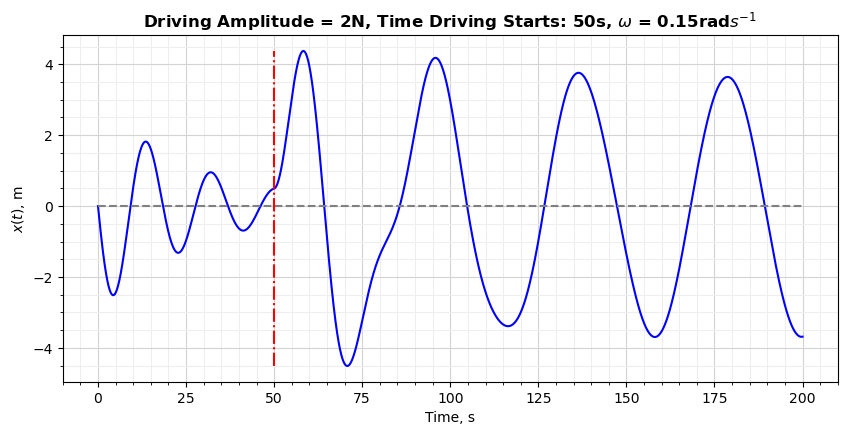

In [16]:
# We define an acceleration function
def acc_drive(x, v, time, drivetime, amp, freq):
    '''
    Finds the acceleration for a given x, v and time value

    VARIABLES
    --------------------
    x : FLOAT - value of amplitude at a certain time
    v : FLOAT - value of velocity at a certain time
    time : FLOAT - value of time
    drivetime : FLOAT - time at which the driving signal begins
    amp : FLOAT - magnitude of the driving signal
    freq : FLOAT - driving frequency
    '''
    
    # Returns a modified acceleration with the driving term if the time is later than the drive starting time
    if time >= drivetime:
        return ((-k * x) - (b * v) + (amp * np.sin(freq * time))) / m 

    # Normal acceleration before driving starts
    else:
        return ((-k * x) - (b * v)) / m  

# We also need to define a slightly tweaked Verlet loop
def driving_force(h, drivetime, amp, freq):
    '''
    Calculates the arrays for x, v and a using the verlet method for a particular
    step, h, and with a driving signal after a given start time
    VARIABLES
    --------------------
    n : FLOAT - number of steps needed
    h : FLOAT - step size, s
    x : NUMPY ARRAY - amplitude of oscillations
    v : NUMPY ARRAY - velocity of oscillations
    a : NUMPY ARRAY - acceleration of oscillations
    drivetime : FLOAT - time at which driving signal begins
    amp : FLOAT - magnitude of the driving signal
    freq : FLOAT - frequency of driving signal

    RETURNS
    ---------------------
    x : NUMPY ARRAY - as above
    '''

    # Define the number of steps we will need based on step, h
    n = int(T / h)

    # Define arrays for the amplitude, velocity and acceleration of the oscillations
    x = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)

    # Starting values of x, v and a
    x[0] = 0 #m
    v[0] = -1.0 #m/s
    a[0] = acc_drive(x[0], v[0], 0, drivetime, amp, freq)

    # Verlet loop
    for i in range(len(x) - 1):

        # Use Improved-Euler method for the second term we need to start Verlet
        if i == 0:
            x[i+1] = x[0] + v[0] * h + (0.5 * a[i] * h**2)

        # After starting value the verlet loop begins
        else:
            x[i+1] = (2 * x[i]) - x[i-1] + (a[i] * (h**2))

        # Updates both acceleration and velocity values for use in next iteration
        a[i+1] = acc_drive(x[i+1], v[i], (i * h), drivetime, amp, freq)

        v[i+1] = v[i] + ((a[i] + a[i+1]) * h * 0.5) # Second term is average acc in between v[i] and v[i+1]
    
    return x

# Set a time the driving will begin
drivetime = 50 # s

# Set the magnitude of the driving signal
amp = 2 # N

# Set the frequency of the driving signal
freq = 0.15 # rad s^-1

# Calls the driving force function we defined above to find values for x(t)
x = driving_force(0.005, drivetime, amp, freq)

# Defines the figure and axis to plot the oscillations on for visualisation
fig, ax = plt.subplots(figsize = (10, 4.5))

# Writing the units for frequency for proper formatting (rf strings don't always format right)
f_unit = r'rad$s^{-1}$'

# Plots the oscillations
ax.plot(runtime, x, color = 'blue')

# Plots a horizontal line at the equilibrium line, x(t) = 0, and a vertical line when driving begins
ax.hlines(y = 0, xmin = np.min(runtime), xmax = np.max(runtime), colors = 'grey', linestyles = '--')
ax.vlines(x = drivetime, ymin = np.min(x), ymax = np.max(x), colors = 'red', linestyles = '-.')

# Sets a title and labels for clarity
ax.set_title(rf'Driving Amplitude = {amp}N, Time Driving Starts: {drivetime}s, $\omega$ = {freq}{f_unit}', weight = 'bold')
ax.set_xlabel('Time, s')
ax.set_ylabel(r'$x(t)$, m')

# Sets major and minor grid squares
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 15 - The system undergoing forced (driven) oscillations, starting at the time marked by the red vertical line.}$

As we can see, the system decays naturally before $50$s, before entering a 'transient' phase between approximately $50 - 120$s, after which it enters a phase of steady oscillations. This transient period is the response of the system to being suddenly driven after previously no driving force at all, and is a non-repetitive and unstable period of oscillation. After that period, however, the system reaches a stage of steady oscillations dominated by the driving frequency. 

It is also important to note the fact that here we are using a driving signal with a magnitude of just $2$N compared to the sudden pushing force of several hundred (or even over $1000$) N. This is because the sudden pushing force is applied at a single step, so the acceleration for a $2$N sudden push on a system is very small compared to a much larger force of several hundred N. This driving signal is continual after the driving starts, and so the amplitude of oscillation has a much larger time to react to the changes - a smaller force is more appropriate.

#### 9.2.2 - Varied Amplitude

Let us vary the amplitude, but keep the frequency constant to see the effect of a larger or smaller driving force, as well as changing the sign of the force. We will keep the drivetime set at $50$s and the damping constant  $b = 0.4$kgs$^{-1}$ as before for consistency.

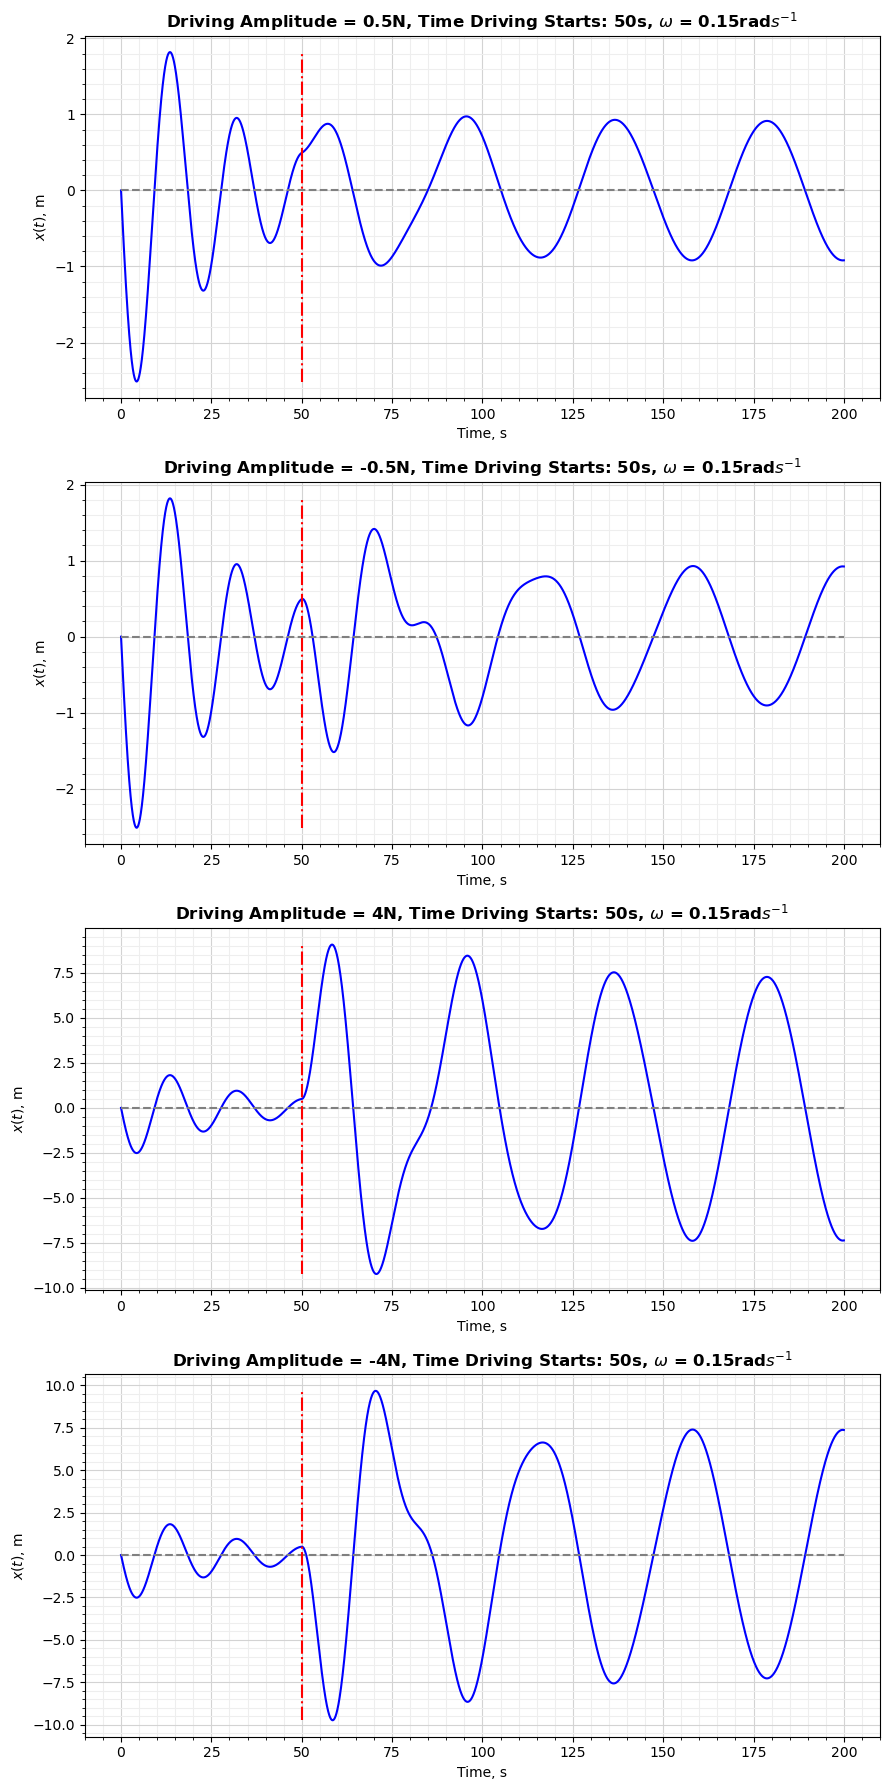

In [17]:
# Let us define some amplitudes for the driving signal
amps = [0.5, -0.5, 4, -4]

# Creates the figure and axes for plotting
fig, axs = plt.subplots(4, 1, figsize = (9, 18))

# Once again looping through each amplitude and plotting the results for each to demonstrate the differenes in the plot
for i in range(len(amps)):

    # Finds the displacement from equilibrium at each time using the function we created earlier
    x_amp = driving_force(0.005, drivetime, amps[i], freq)

    # Plots the displacement against time
    axs[i].plot(runtime, x_amp, color = 'blue')

    # Plots a horizontal line at the equilibrium position and a vertical line at the start of the driving
    axs[i].hlines(y = 0, xmin = np.min(runtime), xmax = np.max(runtime), colors = 'grey', linestyles = '--')
    axs[i].vlines(x = drivetime, ymin = np.min(x_amp), ymax = np.max(x_amp), colors = 'red', linestyles = '-.')

    # Sets titles and labels for clarity and distinguishability of each plot
    axs[i].set_title(rf'Driving Amplitude = {amps[i]}N, Time Driving Starts: {drivetime}s, $\omega$ = {freq}{f_unit}', weight = 'bold')
    axs[i].set_xlabel('Time, s')
    axs[i].set_ylabel(r'$x(t)$, m')

    # Creates the grid squares (major and minor)
    axs[i].grid(which = 'major', color = 'lightgray')
    axs[i].grid(which = 'minor', color = '#EEEEEE')
    axs[i].minorticks_on()
    axs[i].set_axisbelow(True)

# Formats the figure a bit more compactly
plt.tight_layout()

$\textit{Figure 16 - Four different combinations of amplitude and amplitude sign for the driven oscillations of the system.}$

As we might have expected, an increased amplitude of driving force creates a larger steady oscillation after the driving starts, though has no visible impact on the length of the transient period. A negative amplitude also has the effect of a $\pi$ radian phase shift compared to postive amplitude oscillations. 

#### 9.2.3 - Varied Frequency

We will now vary the frequency of the driving signal and observe its effect. We will use a set drivetime of $50$s, a driving amplitude of $2$N and a damping constant $b = 0.4$kgs$^{-1}$ for consistency.

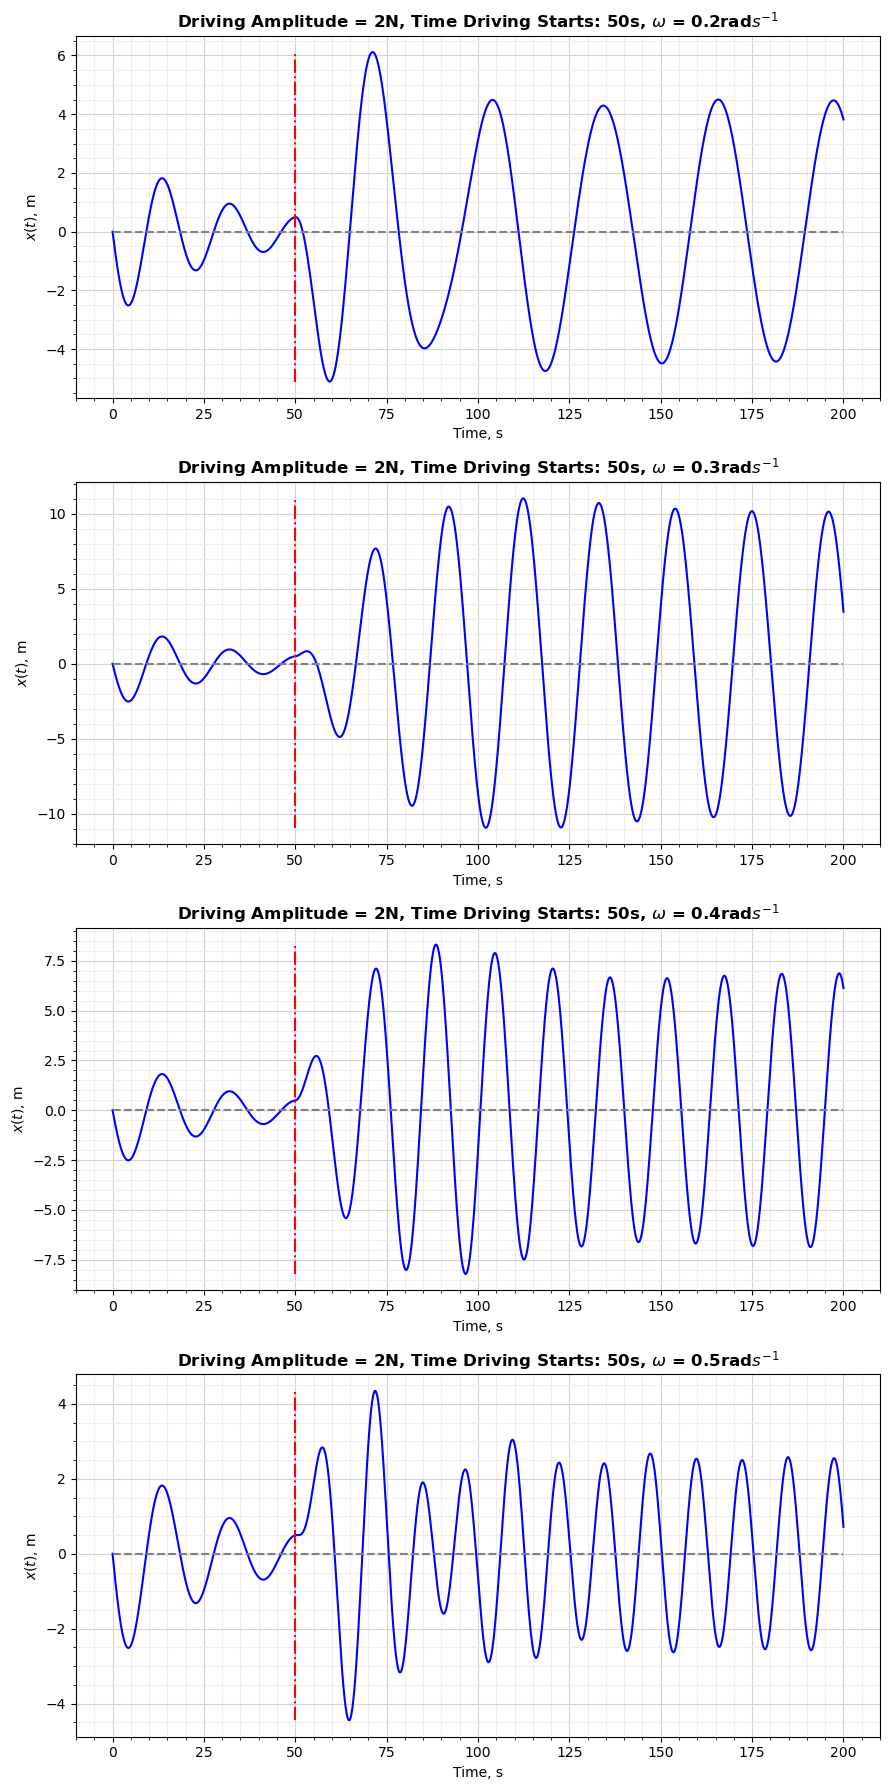

In [18]:
# We will define a set of frequencies to test out
freqs = [0.2, 0.3, 0.4, 0.5]

# Creates the figure and the axes on which we will plot
fig, axs = plt.subplots(4, 1, figsize = (9, 18))

# Loops over each frequency to make a different plot for each
for i in range(len(freqs)):

    # Finds the displacement as we've seen before
    x_freq = driving_force(0.005, drivetime, amp, freqs[i])

    # Plots the displacement over time
    axs[i].plot(runtime, x_freq, color = 'blue')

    # Plots horizontal line at equilibrium position and vertical line at the start of the driving
    axs[i].hlines(y = 0, xmin = np.min(runtime), xmax = np.max(runtime), colors = 'grey', linestyles = '--')
    axs[i].vlines(x = drivetime, ymin = np.min(x_freq), ymax = np.max(x_freq), colors = 'red', linestyles = '-.')

    # Sets a title and labels the axes for distinguishability of plots
    axs[i].set_title(rf'Driving Amplitude = {amp}N, Time Driving Starts: {drivetime}s, $\omega$ = {freqs[i]}{f_unit}', weight = 'bold')
    axs[i].set_xlabel('Time, s')
    axs[i].set_ylabel(r'$x(t)$, m')

    # Plots major and minor grid squares for clarity
    axs[i].grid(which = 'major', color = 'lightgray')
    axs[i].grid(which = 'minor', color = '#EEEEEE')
    axs[i].minorticks_on()
    axs[i].set_axisbelow(True)

# Plots a little more compactly
plt.tight_layout()

$\textit{Figure 17 - Four different simulations showing the effect of changing the driving frequency of the forced oscillations.}$

Altering the frequency of course changes the frequency of the driven oscillations in the steady oscillation phase (following the transient period immediately after the driving force comes into effect), but also has an effect on the magnitude of the maximum displacement - this is an effect of resonance between the natural frequency and driving frequency of the system. Let's investigate that further.

### 9.3 - Resonance

Resonance is the condition where the driving frequency $\omega$ is very close to the natural frequency of the system $\omega_0$ and hence the amplitude of the displacement of the system in response to the driving reaches a maximum. As $\omega$ increases or decreases away from $\omega_0$, the system responds less to the driving signal, causing the system to oscillate at a lower maximum amplitude. We will investigate where our system experiences resonances by driving our system from $50$s after starting the simulation, using a damping constant of $b = 0.4$kgs$^{-1}$ and a driving force amplitude of $2$N. To do this, we will plot maximum amplitude of oscillation (after transient phase) against frequency. We should expect resonance to occur where $\omega \approx \omega_{0}$, where $\omega_{0} \approx \sqrt{\frac{k}{m}} \approx 0.342$ rads$^{-1}$. The effect of damping on the system acts to reduce the resonant (or natural) frequency, but our values of $b = 0.4$kgs$^{-1}$ and $m = 5.72$kg produce only a small effect, with $\omega_{\text{res}} = \sqrt{\frac{k}{m} - \left( \frac{b}{2m} \right)^2} \approx 0.340$rads$^{-1}$.

From the first year, we are familiar with the formula for the amplitude of a driven harmonic oscillator in terms of driving and resonant frequencies,

\begin{equation*}
A(\omega) = \frac{F_0}{m \sqrt{\left(\omega_0^2 - \omega^2\right)^2 + \left(\frac{b}{m}\omega\right)^2}} \tag{18}
\end{equation*}

where all symbols are as previously defined, aside from $A(\omega)$ which is the maximum amplitude in m for a given driving frequency. We can plot this curve alongside our findings to confirm we are indeed getting the results we expect.

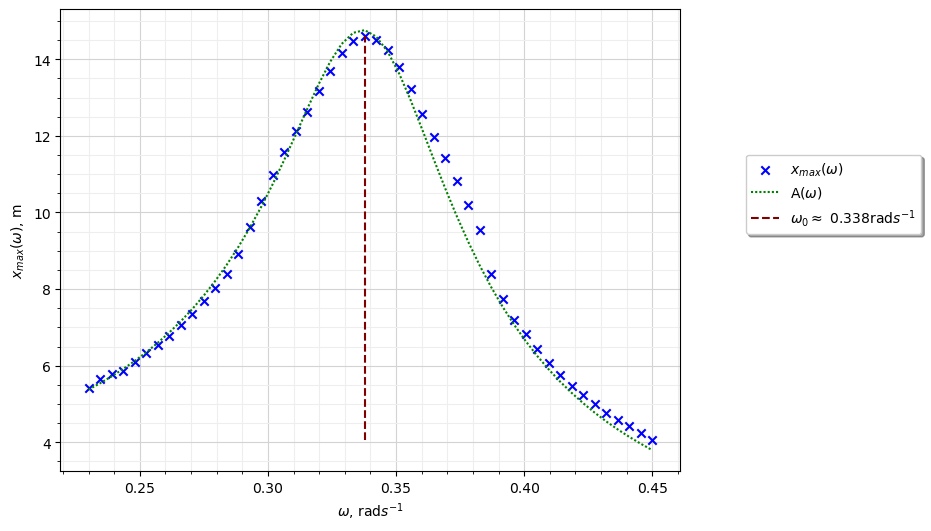

In [19]:
# Define a list of frequencies around the natural frequency of ~ 0.34 rad/s
freq_list = np.linspace(0.23, 0.45, 50)

# Define a function to find the theoretical amplitude
def model_amplitude(omega):
    '''
    Finds the theoretical amplitude for each frequency, omega

    VARIABLES
    -------------------
    omega : FLOAT - value of angular frequency, rad/s
    '''
    # Finds theoretical value of omega_0
    theory_omega = np.sqrt((k / m) - ((b / (2 * m)) ** 2))

    # Returns the value of equation 18
    return (amp / m) * np.sqrt(1 / ((((omega**2) - (theory_omega**2)) ** 2) + (((b * omega) / m) ** 2)))

# Finds the model_amplitude using the function we have just defined and the list of frequencies
model_amp = model_amplitude(freq_list)

# Creates a new array for the maximum displacement of each driving frequency
max_amp = []

# Looping over each entry in the frequency array
for i in range(len(freq_list)):

    # Again finding the displacement for each frequency
    x_res = driving_force(0.005, drivetime, amp, freq_list[i])

    # Finds the maximum value of this displacement afterthe transient period ~ 125s of simulation time,
    # as the transient period can create large spikes in amplitude.
    x_res_after_transient = x_res[int((125 / 200) * len(x_res)):]
    max_amp.append(np.max(x_res_after_transient))

# Finds the maximum value of the max amplitude array; the peak of the resonance graph
res_amp = np.max(max_amp)

# Loops through the max_amp array to find the element to find the frequency of that peak
for i in range(len(max_amp)):

    # Finds the resonant frequency
    if max_amp[i] == res_amp:
        res_freq = freq_list[i]
    
# Creates the figure and axis for this plot
fig, ax = plt.subplots(figsize = (8,6))

# Scatters each maximum amplitude in m against frequency
ax.scatter(freq_list, max_amp, marker = 'x', color = 'blue', label = r'$x_{max}(\omega)$')

# Plots model discussed above
ax.plot(freq_list, model_amp, color = 'green', linestyle = (0, (1, 1)), label = r'A($\omega$)')

# Creates a vertical line at the value of the resonant frequency
ax.vlines(x = res_freq, ymin = np.min(max_amp), ymax = res_amp, colors = 'maroon', \
          linestyles = '--', label = rf'$\omega_0 \approx$ {res_freq:.3g}{f_unit}')

# Sets axis labels
ax.set_xlabel(rf'$\omega$, {f_unit}')
ax.set_ylabel(r'$x_{max}(\omega)$, m')

# Sets a helpful legend to the side of the figure
ax.legend(bbox_to_anchor = (1.4, 0.7), fancybox = True, shadow = True)

# Creates major and minor grid squares for clarity
ax.grid(which = 'major', color = 'lightgray')
ax.grid(which = 'minor', color = '#EEEEEE')
ax.minorticks_on()
ax.set_axisbelow(True)

$\textit{Figure 18 - The resonance curve of the system in the small range of frequency nearby the resonant frequency, showing a good fit to the theoretical result.}$

The resonance appears to occur at $\approx 0.338$ rads$^{-1}$, which is very close to the theoretical value of $0.340$ rads$^{-1}$, with our calculated amplitude very close to the expected resonance curve. Furthermore, as expected, for frequencies above and below $\omega_{0}$, the response from the system is lower.

<b> [Go Back To Contents](#Contents)

***

## 10 - Conclusion

With that, we bring this notebook to an end. To summarise, we have discussed the efficacy of four different methods of numerical integration - Euler, Improved-Euler, Verlet and Euler-Cromer, of which we found Verlet to be the least erroneous for a constant step by comparing the residuals of all four methods against the analytical solution. Using the Verlet method, we investigated the effect of damping on the system, after which we investigated two types of external forces on the system for which our original analytical solution no longer applied - a sudden push, and constant sinusoidal driving force. Regarding the latter, we plotted the resonance curve of the system for our values of k and m and found that our numerical methods accurately reproduce the theoretical result.

<b> [Go Back To Contents](#Contents)

***

## Appendix

### 1 - Animated Plot

In order to visualise the evolution of the original system we studied between sections 3-7 with a damping constant $b = 0.4$kgs$^{-1}$, we can create an animated plot. Because the system is simulated over a long period of time, we can speed this up by a factor of 10 to produce a simple, animation of our system.

In [20]:
# Due to the nature of animated plots, this cell takes roughly 35 seconds to load!

# Creates figure and axes to plot both the figures on
fig, axs = plt.subplots(1, 2, figsize = (10, 4), gridspec_kw={'width_ratios': [2, 1]})

# Creates the model and time solution using previously defined functions
time_anim = euler(1)[3]
model_anim = analytical_sol(time_anim)

# Define a function to animate the graph
def animate(frame):
    '''
    Updates all the frames of the animation

    VARIABLES
    ---------------------
    frame : INTEGER - frame number
    time_plot : ARRAY - array of time up to element of current frame
    model_plot : ARRAY - array of x(t) up to element of current frame
    '''

    # Creates the time and model value arrays that we will need for the plot
    time_plot = []
    model_plot = []

    # Looping over each previous frame
    for i in range(frame):

        # Fills time and x(t) arrays with values up to the current frame
        time_plot.append(time_anim[i])
        model_plot.append(model_anim[i])

    # Clears the axes for the new frame
    axs[0].clear()
    axs[1].clear()

    # Sets the limits for the two plots
    axs[0].set(xlim = (-5, 105), ylim = (-2.7, 2))
    axs[1].set(xlim = (-5, 5), ylim = (-2.7, 2))

    # Equilibrium lines at y = 0
    axs[0].hlines(y = 0, xmin = -5, xmax = 105, colors = 'dimgrey', linestyles = '--', label = 'Equilibrium Position')
    axs[1].hlines(y = 0, xmin = -5, xmax = 5, colors = 'dimgrey', linestyles = '--')

    # Axis labels for each plot
    axs[0].set_xlabel('Time, s')
    axs[0].set_ylabel(r'Displacement, $x(t)$, m')
    axs[1].set_xlabel('Distance, m')
    axs[1].set_ylabel(r'Displacement, $x(t)$, m')

    # Grid lines for each plot
    axs[0].grid(which = 'major', color = 'lightgray')
    axs[0].grid(which = 'minor', color = '#EEEEEE')
    axs[0].minorticks_on()
    axs[0].set_axisbelow(True)

    axs[1].grid(which = 'major', color = 'lightgray')
    axs[1].grid(which = 'minor', color = '#EEEEEE')
    axs[1].minorticks_on()
    axs[1].set_axisbelow(True)

    # Plots the line path of the bobbing mass and the mass itself as a red ball
    axs[0].plot(time_plot, model_plot, color = 'blue')
    axs[0].plot(time_anim[frame-1], model_anim[frame-1], marker = 'o', markersize = 10, color = 'red', label = 'Location of Oscillating Mass')

    # Spring visual, fixed top at y=2 and its vertical displacement
    spring_top = 2
    spring_length = spring_top - model_anim[frame-1]

    # Create a sine wave for the zigzag effect of spring, (didn't really work)
    num_coils = 10 
    x_spring = np.linspace(-1, 1, 100)
    y_spring = np.sin(num_coils * np.pi * x_spring)  

    # Scale the sine wave vertically to represent the spring's stretching or compressing
    y_spring_scaled = spring_length * y_spring

    # Plot the spring from the fixed top bobbing with the mass position
    axs[1].plot(np.zeros_like(x_spring), spring_top + y_spring_scaled, color="green", lw=2)

    # Plots the mass itself bobbing up and down for further visualisation
    axs[1].plot(0, model_anim[frame-1], marker = 'o', markersize = '10', color = 'red')

    # Time elapsed of each frame displayed to user
    axs[0].text(55, 1.6, f"Time elapsed: {frame*1}s", fontsize = 12, fontweight = 'bold')

    # Sets the legend
    axs[0].legend(loc = 'best', fancybox = True, shadow = True)

# Creates an object to hold our animation
anim = FuncAnimation(fig, animate, frames = range(int(len(time_anim) / 2)), interval = 100)

# Creates a video
video = anim.to_html5_video()

# Displays the video
html = display.HTML(video)
display.display(html)
plt.close()

$\textit{Figure A1 - System's Evolution at 10X Speed, shown against time (left) and horizontal/vertical movement (right).}$

$\textit{Note that the right plot shows the mass on a spring (green line), while the left plot omits the spring for clarity.}$

<b> [Go Back To Contents](#Contents)

***